# Сборный проект —2

## Вводная часть

<a id='1-topoc'></a>

### Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников.Компания предоставила данные с характеристиками сотрудников компании. Бизнес хочет понимать уровень удовлетворенности сотрудников и вероятность их ухода из компании. Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

____

### Цель исследования

Разработать решение, которое позволит избежать финансовых потерь и оттока сотрудников.

____

### Задачи исследования

 - Первая задача: построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.
 - Ваша вторая задача: построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

____

### Исходные данные


Для этой задачи заказчик предоставил данные с признаками:

- id — уникальный идентификатор сотрудника;
- dept — отдел, в котором работает сотрудник;
- level — уровень занимаемой должности;
- workload — уровень загруженности сотрудника;
- employment_years — длительность работы в компании (в годах);
- last_year_promo — показывает, было ли повышение за последний год;
- last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
- supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
- salary — ежемесячная зарплата сотрудника;
- job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

____

### Ход исследования

- [Вводная часть](#1-topoc)


- [Задача 1](#задача1)

1) [Загрузка данных](#2-topoc)

2) [Предобработка данных](#3-topoc)

3) [Исследовательский анализ](#4-topoc)

4) [Подготовка данных](#5-topoc)

5) [Обучение моделей](#6-topoc)

6) [Вывод](#7-topoc)


- [Задача 2](#задача2)


1) [Загрузка данных](#2.1-topoc)

2) [Предобработка данных](#3.1-topoc)

3) [Исследовательский анализ](#4.1-topoc)

4) [Добавление нового входного признака](#5.1-topoc)

5) [Подготовка данных](#6.1-topoc)

6) [Обучение моделей](#7.1-topoc)

7) [Вывод](#8.1-topoc)


- [Общий вывод](#задача3)


<a id='задача1'></a>
## Задача 1: предсказание уровня удовлетворённости сотрудника

<a id='2-topoc'></a>
### Загрузка данных

In [1]:
!pip install shap
!pip install phik
!pip install -U scikit-learn
#!pip install -U pandas
#!pip install -U matplotlib

     |████████████████████████████████| 539 kB 1.9 MB/s eta 0:00:01
     |████████████████████████████████| 686 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 13.4 MB 1.8 MB/s eta 0:00:01    |█████▉                          | 2.4 MB 1.8 MB/s eta 0:00:06
     |████████████████████████████████| 301 kB 91.0 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mp

import scipy.stats as st
import matplotlib.pyplot as plt

import shap
import phik
import re

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance

from sklearn.dummy import DummyRegressor,DummyClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree, _tree
from sklearn.svm import SVC



from sklearn.metrics import (r2_score,
                             mean_absolute_error,
                             mean_squared_error,
                             precision_score,
                             recall_score,
                             accuracy_score,
                             f1_score,
                             fbeta_score,
                             roc_curve,
                             roc_auc_score,
                             RocCurveDisplay,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             make_scorer
                            )


from sklearn.model_selection import (train_test_split,
                                     GridSearchCV,
                                     RandomizedSearchCV,
                                     cross_val_score
                                    )

from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   RobustScaler,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder
                                  )


RANDOM_STATE = 42
TEST_SIZE = 0.25

sb.set(style = 'whitegrid')
sb.set(rc={'figure.figsize':(16,9)})
sb.set_context('paper', rc={'font.size': 10,
                             'axes.titlesize': 10,
                             'xtrick.labelsize': 'small',
                             'ytrick.labelsize': 'small',
                             'legend.fontsize': 'small',
                             'legend.title_fontsize':10})

In [68]:
pip freeze > requirements.txt 

/bin/bash: /home/conda/feedstock_root/build_artifacts/alembic_1622150326904/requirements.txtrequirements.txt: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [3]:
Xy_train_js = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',')
X_test_js = pd.read_csv('/datasets/test_features.csv', sep=',')
y_test_js = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',')

#### Первичное изучение

In [4]:
display(Xy_train_js.head())
Xy_train_js.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [5]:
display(X_test_js.head())
X_test_js.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [6]:
display(y_test_js.head())
y_test_js.info()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


#### Вывод

В наборах данных обнаружено незначительное количество пропусков, данные хорошо структурированы, типы везде соответсвуют фактическим. Наблюдается большое количество категориальных признаков.

<a id='3-topoc'></a>
### Предобработка данных

#### Обработка пропусков

In [7]:
display(Xy_train_js[Xy_train_js['dept'].isna()])
display(Xy_train_js[Xy_train_js['level'].isna()])

display(X_test_js[X_test_js['dept'].isna()])
display(X_test_js[X_test_js['level'].isna()])

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
1196,832342,NaN,junior,medium,1,no,no,4,28800


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
312,471990,sales,NaN,low,1,no,no,3,12000


В пропусках наблюдаются некоторые закономерности, но заполнять пропуски на данном этапе не будем, это будет сделано в пайплайне

#### Обработка дубликатов

In [8]:
print(Xy_train_js.duplicated().sum())
print(X_test_js.duplicated().sum())
print(y_test_js.duplicated().sum())

0
0
0


In [9]:
data = {
    '1':Xy_train_js,
    '2':X_test_js,
    '3':y_test_js
}

In [10]:
for name, df in data.items():
    print(name)
    for i in df:
        print(i)
        print(df[i].unique())

1
id
[155278 653870 184592 ... 533318 706868 338347]
dept
['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'high' 'low']
employment_years
[ 2  1  4  7  9  6  3 10  8  5]
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']
supervisor_evaluation
[1 5 2 3 4]
salary
[24000 38400 12000 18000 22800 30000 56400 52800 13200 54000 19200 40800
 34800 27600 26400 33600 50400 15600 14400 25200 72000 31200 32400 48000
 43200 46800 58800 84000 44400 39600 37200 21600 28800 62400 60000 42000
 49200 55200 57600 68400 45600 51600 64800 80400 20400 61200 76800 69600
 16800 36000 63600 81600 66000 74400 67200 70800 73200 75600 79200 94800
 78000 88800 92400 85200 91200 98400 96000 97200]
job_satisfaction_rate
[0.58 0.76 0.11 0.37 0.2  0.78 0.56 0.44 0.14 0.47 0.74 0.42 0.32 0.57
 0.16 0.69 0.33 0.64 0.39 0.8  0.79 0.17 0.65 0.18 0.19 0.49 0.63 0.22
 0.23 0.5  0.35 0.3  0.77 0.88 0.59 0.21 0.36 0.85 0.7  0.48 0.6  0.1
 0.27 0.71 

In [11]:
X_test_js['dept'] = X_test_js['dept'].replace(' ',None)

In [12]:
Xy_train_js['level'] = Xy_train_js['level'].replace('sinior','senior')
X_test_js['level'] = X_test_js['level'].replace('sinior','senior')
X_test_js['level'].unique()

array(['junior', 'middle', 'senior', nan], dtype=object)

#### Обработка выбросов

1


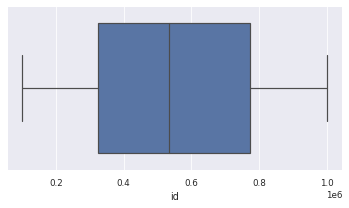

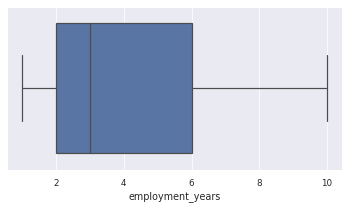

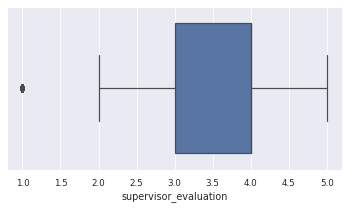

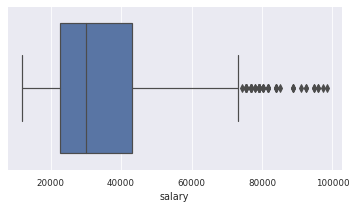

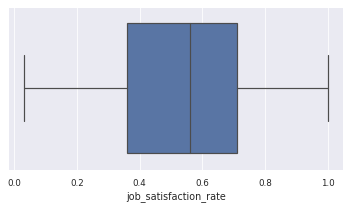

2


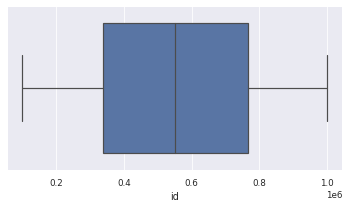

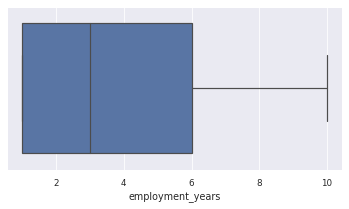

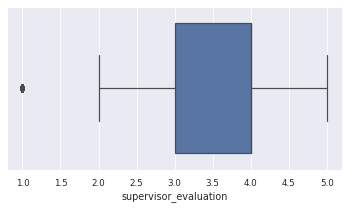

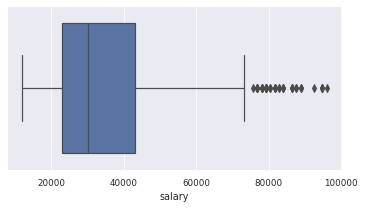

3


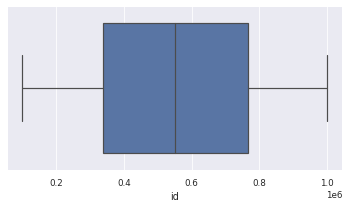

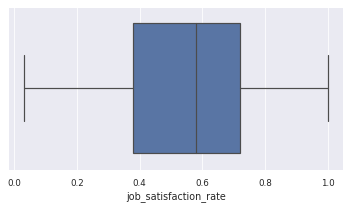

In [13]:
for name, df in data.items():
    print(name)
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(6,3))
            sb.boxplot(x=df[col])
            plt.show()

#### Вывод

В предоставленных данных полных и неявных дубликатов не обнаружено. Выбросов также не обнаружено. Обнаружены пропуски, но заполнять пропуски на данном этапе не будем, это будет сделано в пайплайне.

<a id='4-topoc'></a>
### Исследовательский анализ

#### Общий анализ распределения показателей

1


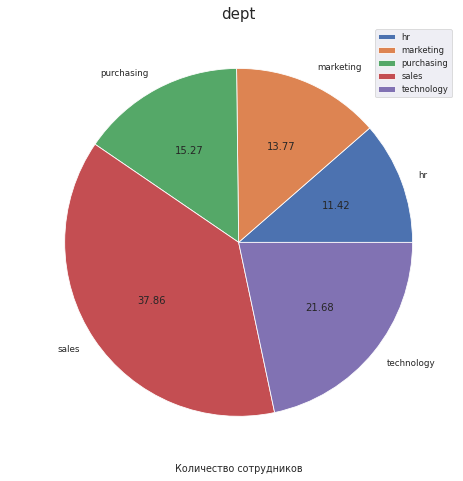

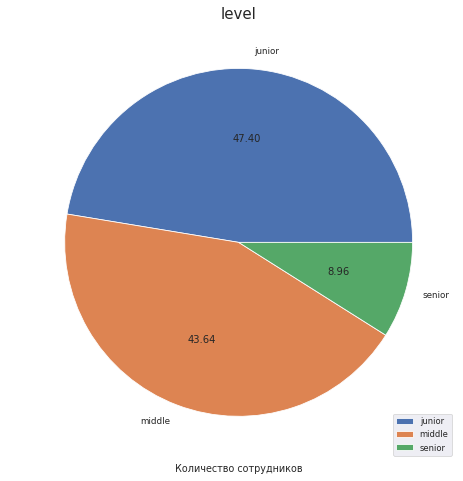

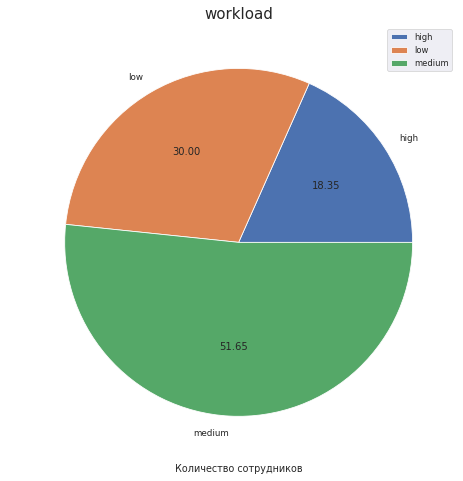

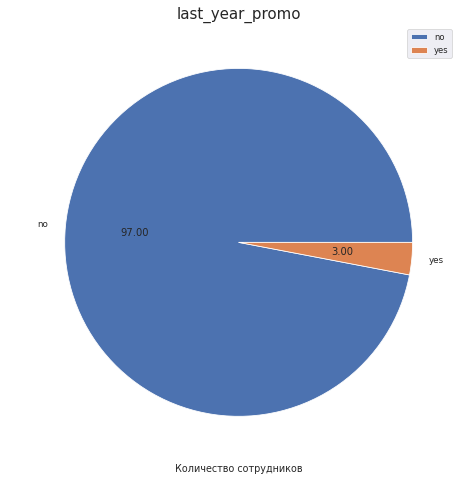

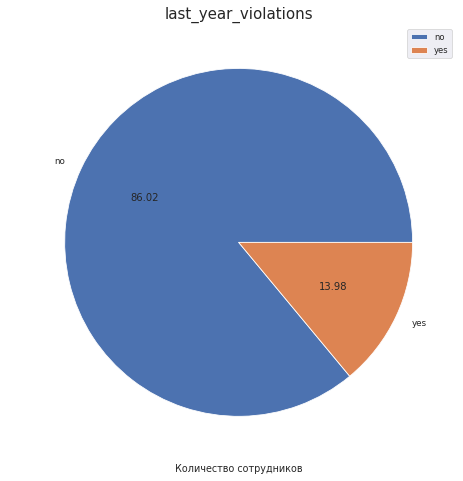

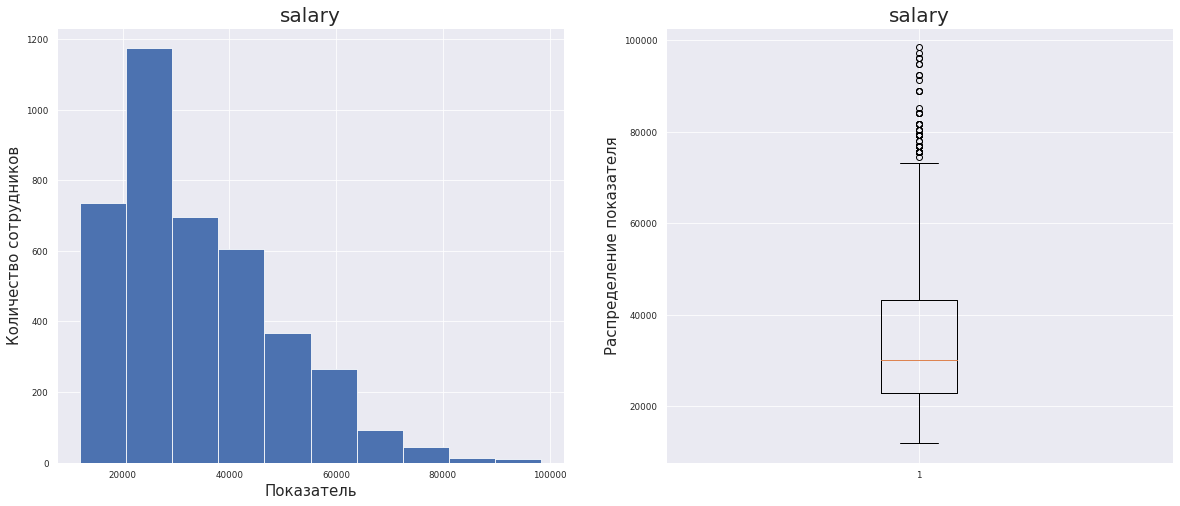

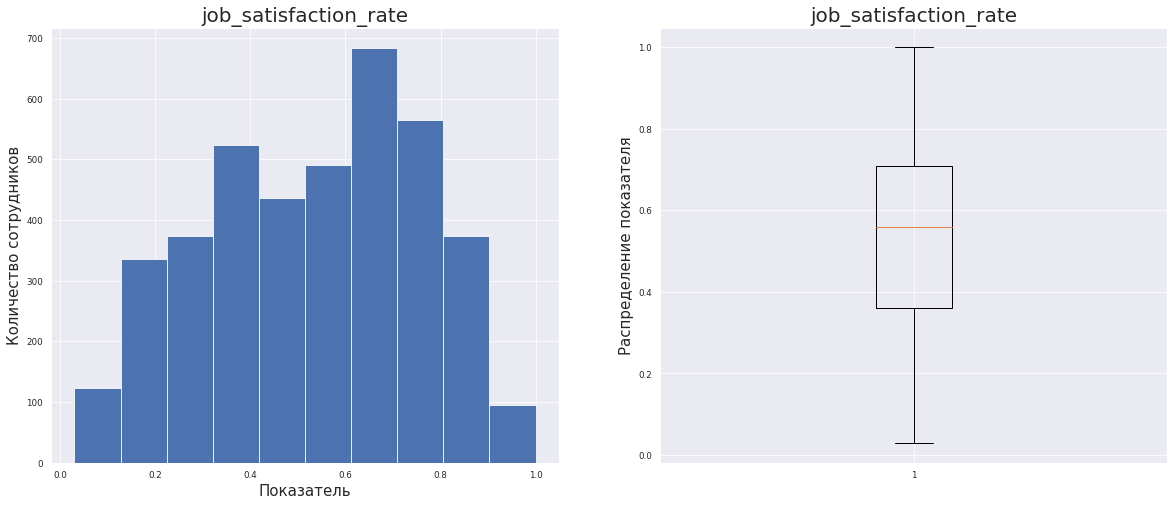

2


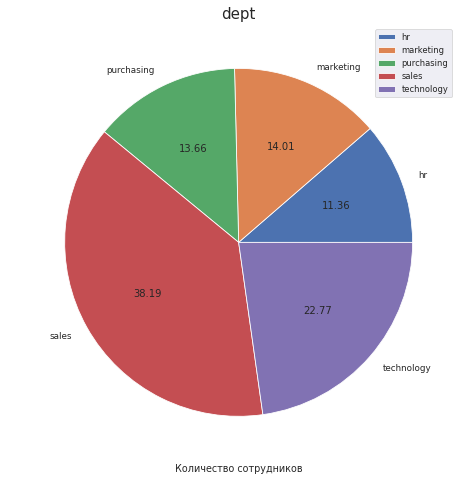

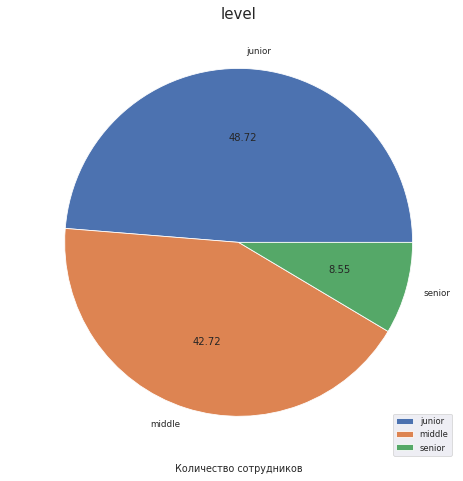

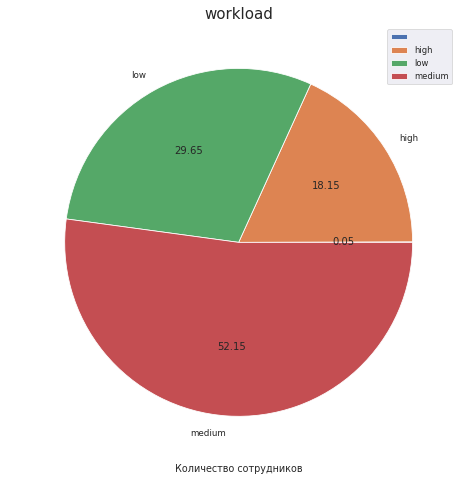

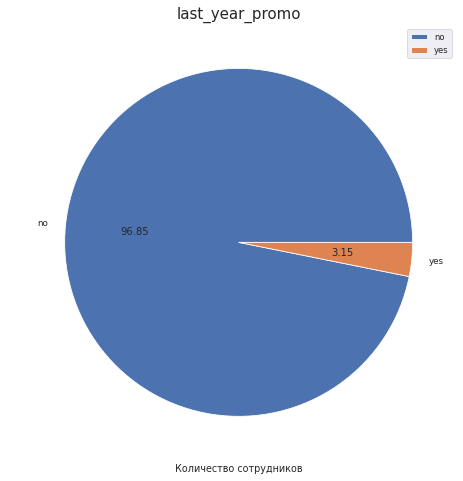

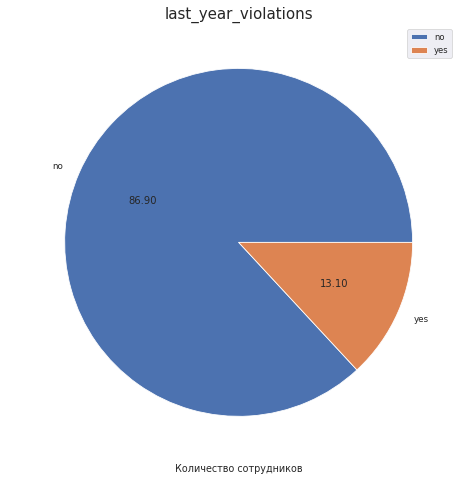

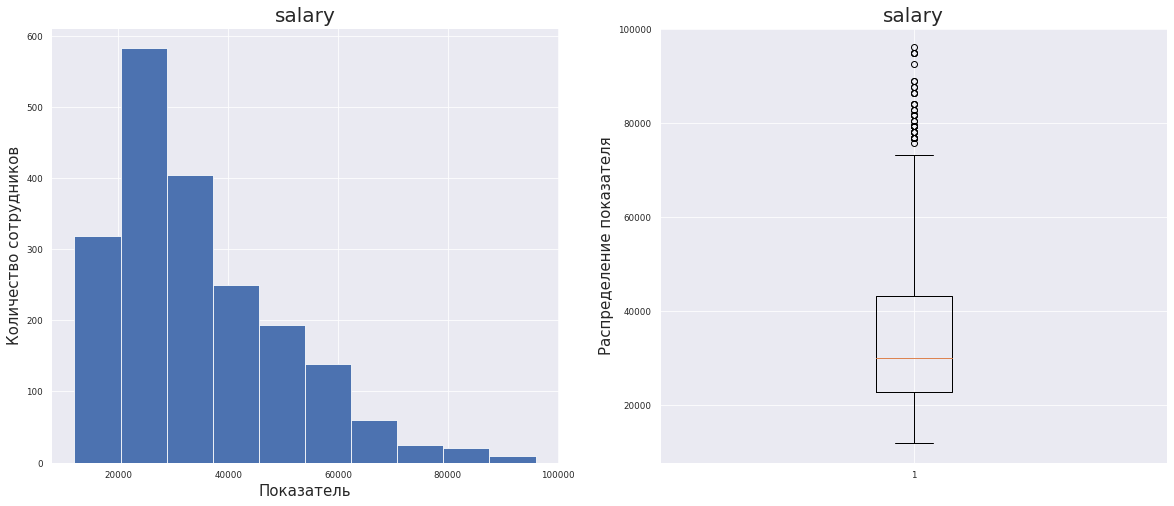

3


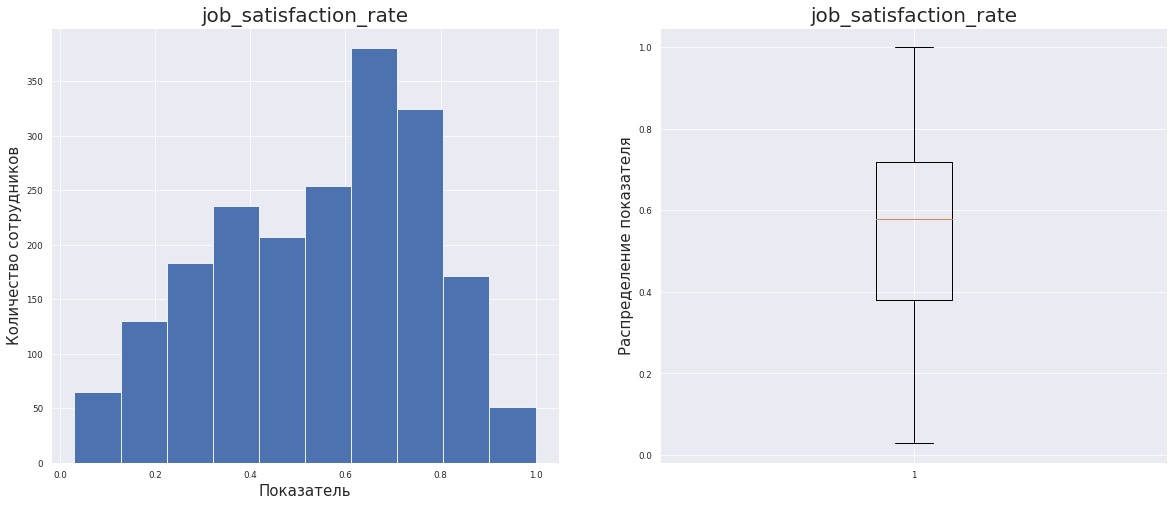

In [14]:
for name, df in data.items():
    print(name)
    for col in df.columns:
        if (df[col].dtype in ['int64', 'float64'])&(col!='id')&(col!='supervisor_evaluation')&(col!='employment_years'):
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
            axes[0].hist(x=df[col])
            axes[0].set_title(col, fontsize=20)
            axes[0].set_xlabel('Показатель', fontsize=15)
            axes[0].set_ylabel('Количество сотрудников', fontsize=15)

            axes[1].boxplot(x=df[col])
            axes[1].set_title(col, fontsize=20)
            axes[1].set_xlabel(' ')
            axes[1].set_ylabel('Распределение показателя', fontsize=15)

            plt.show()
        else:
            if (col != 'id') & (col != 'Период')&(col!='supervisor_evaluation')&(col!='employment_years'):
                plt.figure()
                plotik = df.groupby(col)['id'].count().plot.pie(figsize=(15,8), autopct="%.2f",subplots=False, legend=True)
                plotik.set_xlabel('Количество сотрудников')
                plotik.set_title(col, fontsize=15)
                plotik.set_ylabel(' ')

1


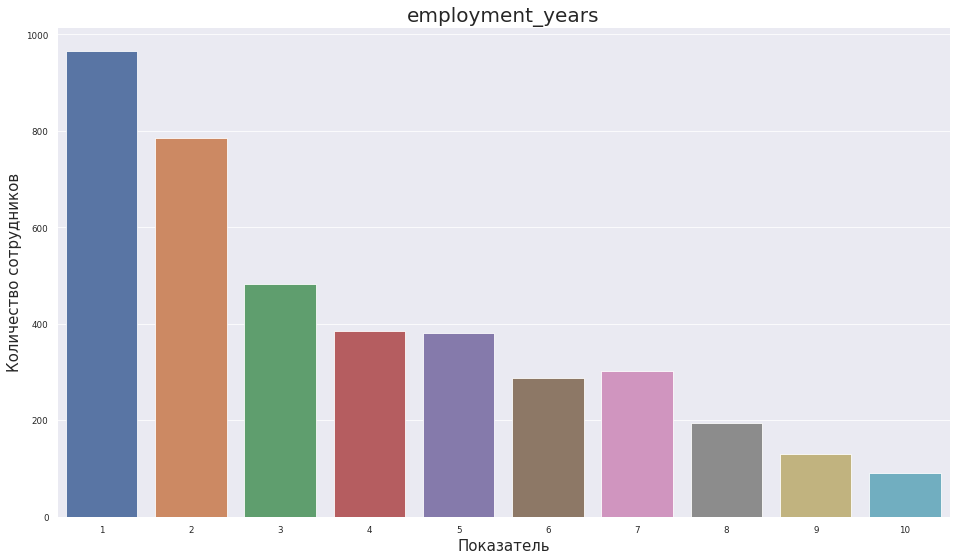

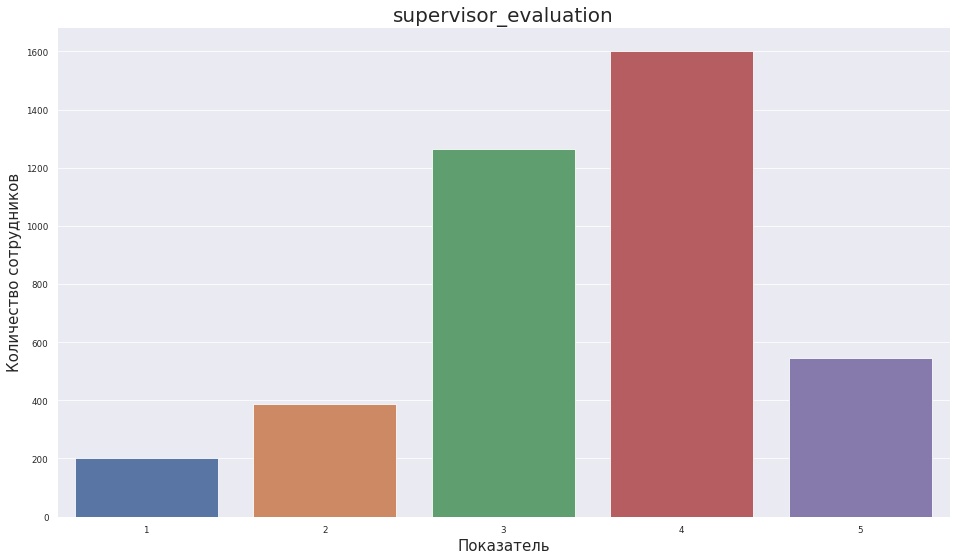

2


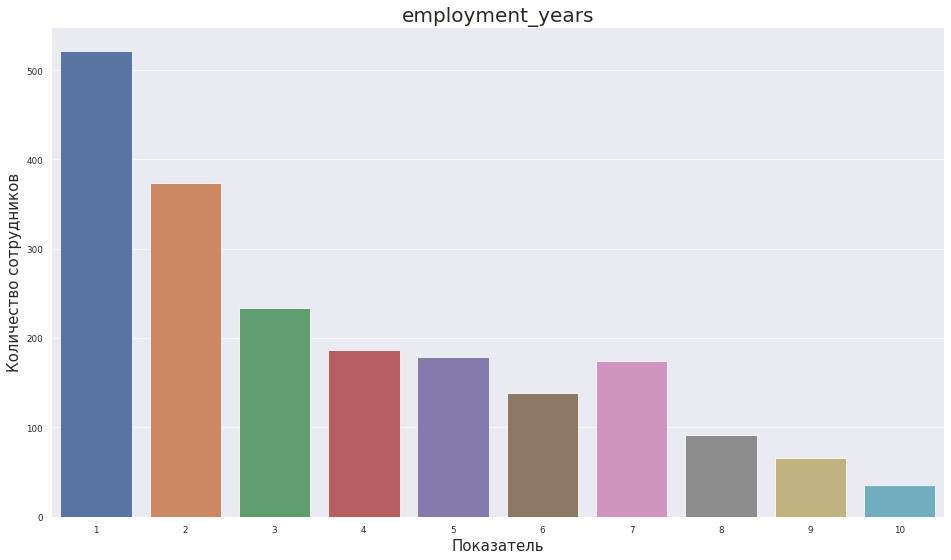

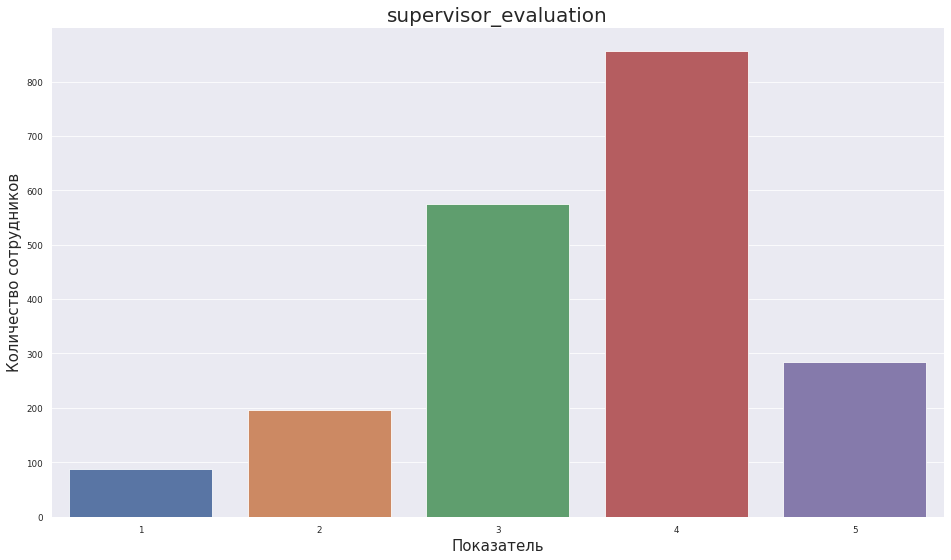

3


In [15]:
for name, df in data.items():
    print(name)
    for col in df.columns:
        if (df[col].dtype in ['int64', 'float64'])&(col!='id')&((col=='supervisor_evaluation')|(col=='employment_years')):
            plotik = sb.countplot(x=df[col])
            plotik.set_title(col, fontsize=20)
            plotik.set_xlabel('Показатель', fontsize=15)
            plotik.set_ylabel('Количество сотрудников', fontsize=15)
            plt.show()

По графикам выше можно сделать следующие выводы:
- Отдел продаж самый многочисленный (38%)
- По должностям: 47% - рядовые менеджеры, 44% - локальные руководители, 9% - топ менеджмент
- Большинствро сотрудников 52% имеют среднюю загруженность
- В компании большинство сотрудников работают от года до двух
- За последний год повышение было только у 3% персонала
- Около 14% сотрудников за последний год нарушали трудовой договор, остальные не нарушали
- Работа большинства сотрудников оценивается как 4 из 5
- Средняя зарплата у сотрудников около 30 тыс.р.
- У большинства сотрудников уровень удовлетворенности 7 из 10

#### Анализ таргета

Очевидно, что на удовлетворенность работы должны оказывать влияние: загрузка, з/п и занимаемая должность. Посмотрим как эти показатели взаимодействуют.

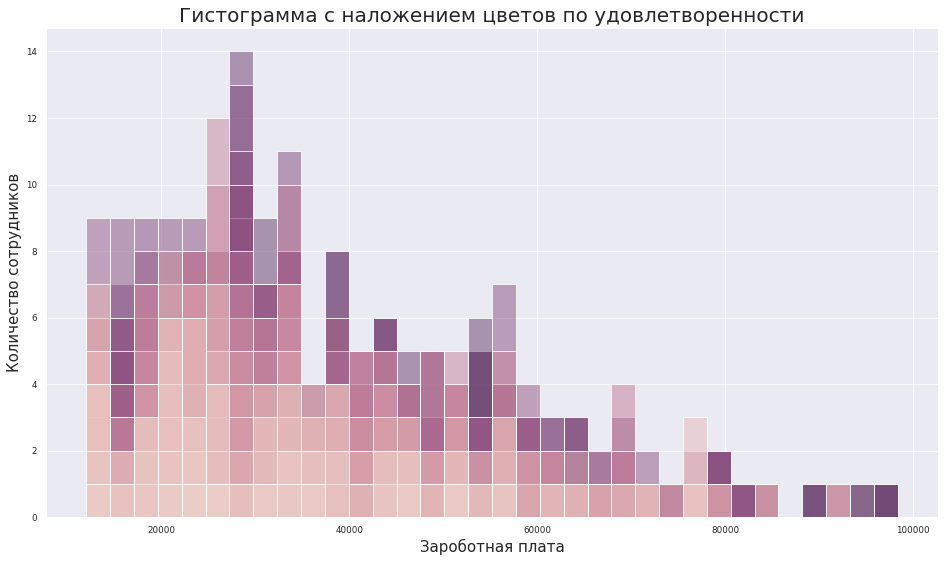

In [16]:
#специально убрала легенды, они очень громоздкие. не бейте...
pl = sb.histplot(data=Xy_train_js, x='salary', hue='job_satisfaction_rate',legend = False)
pl.set_title('Гистограмма с наложением цветов по удовлетворенности', fontsize=20)
pl.set_xlabel('Зароботная плата', fontsize=15)
pl.set_ylabel('Количество сотрудников', fontsize=15);
plt.show()

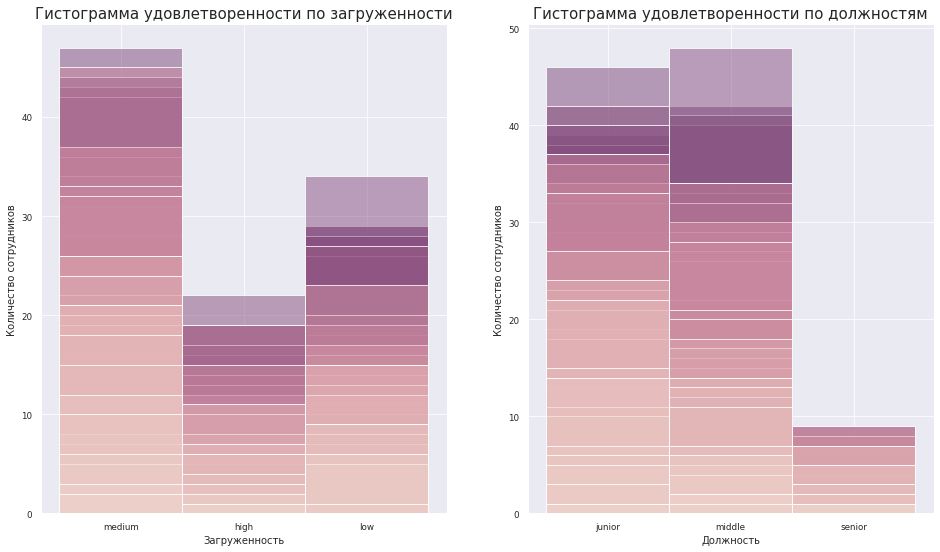

In [17]:
plt.subplot(1, 2, 1)
sb.histplot(data=Xy_train_js, x='workload', hue='job_satisfaction_rate',legend = False)
plt.title('Гистограмма удовлетворенности по загруженности', fontsize=15)
plt.xlabel('Загруженность', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.subplot(1, 2, 2)
Xy_train_js_table = Xy_train_js.dropna()
sb.histplot(data=Xy_train_js_table, x='level', hue='job_satisfaction_rate', legend = False)
plt.title('Гистограмма удовлетворенности по должностям', fontsize=15)
plt.xlabel('Должность', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.show()

На графиках выше чем светлее цвет, тем ниже уровень удовлетворенности. По графику с зароботной платой можно обнаружить что у работников, чья зарплата ниже - выше уровень неудовлетворенности. По графикам загруженности очевидно самым довольным является сегмент сотрудников с низкой загруженностью, между тем довольство средне и сильно загруженных отличается не существенно. Самым недовольным классом в разрезе должностей оказался топ менеджмент, самые довольные - локальные руководители.

#### Корреляционный анализ

Показатели распределяются не нормально, поэтому для анализа используем коэффициент Спирмена. Для выявления корреляции между категориальными признаками построим еще одну диаграмму.

In [18]:
# full_sp = Xy_train_js.drop('id',axis=1)
# full_sp = sb.heatmap(full_sp.corr(method = 'spearman'), annot=True, cmap='coolwarm')
# full_sp.set_title('Корреляция тренировочных параметров по Спирмену', fontsize=20)
# plt.show()

In [19]:
# Xy_test_js = pd.merge(X_test_js,y_test_js)
# full_sp = Xy_test_js.drop('id',axis=1)
# full_sp = sb.heatmap(full_sp.corr(method = 'spearman'), annot=True, cmap='coolwarm')
# full_sp.set_title('Корреляция тестовых параметров по Спирмену', fontsize=20)
# plt.show()

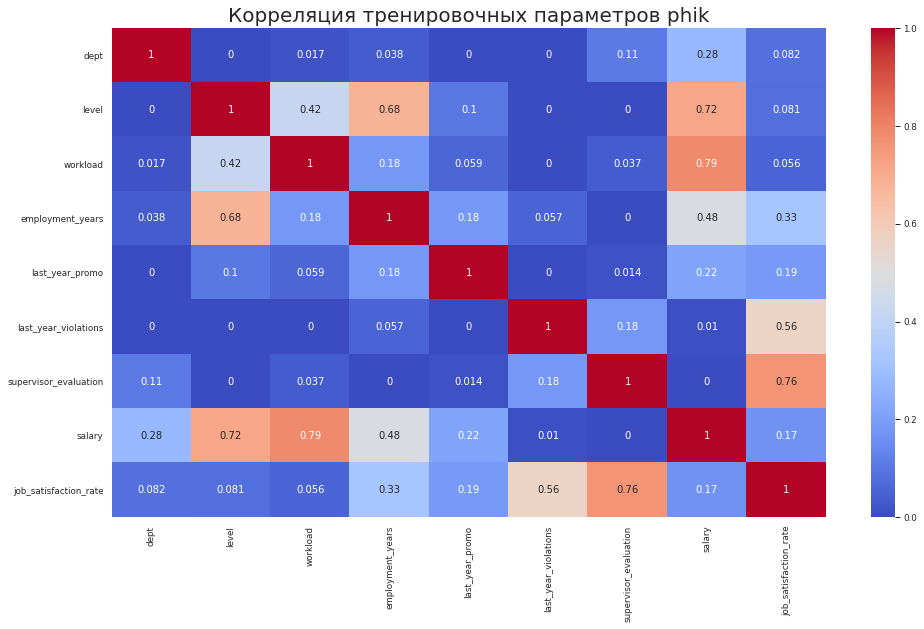

In [20]:
full_phik = Xy_train_js.drop('id',axis=1)
full_phik = sb.heatmap(full_phik.phik_matrix(interval_cols=[  'salary',
                                                              'job_satisfaction_rate'
                                                             ]
                                              ), annot=True, cmap='coolwarm')
full_phik.set_title('Корреляция тренировочных параметров phik', fontsize=20)
plt.show()

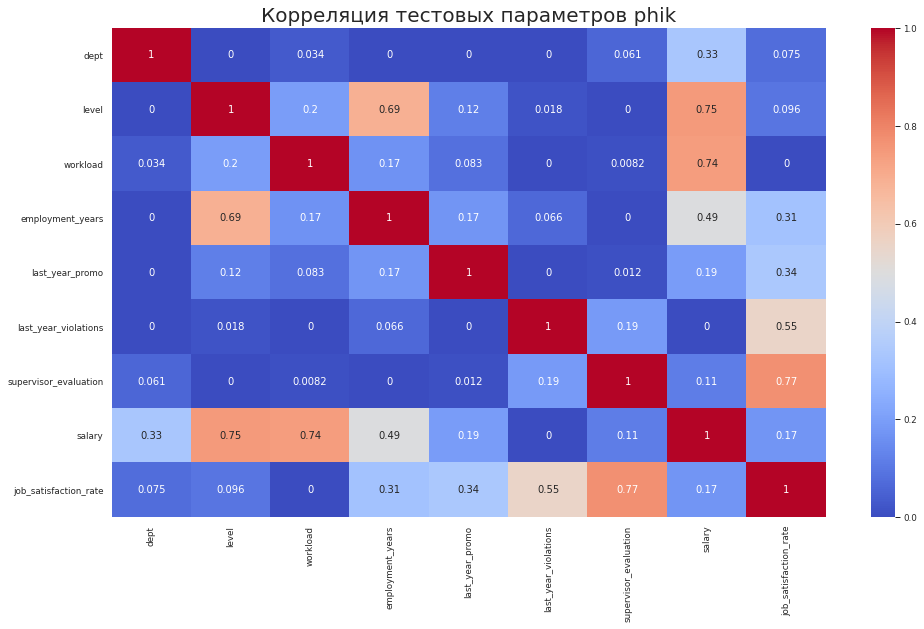

In [21]:
Xy_test_js = pd.merge(X_test_js,y_test_js)
full_phik = Xy_test_js.drop('id',axis=1)
full_phik = sb.heatmap(full_phik.phik_matrix(interval_cols=[  'salary',
                                                              'job_satisfaction_rate'
                                                             ]
                                              ), annot=True, cmap='coolwarm')
full_phik.set_title('Корреляция тестовых параметров phik', fontsize=20)
plt.show()

Матрица диаграмм рассеяния для показателей тренировочной выборки


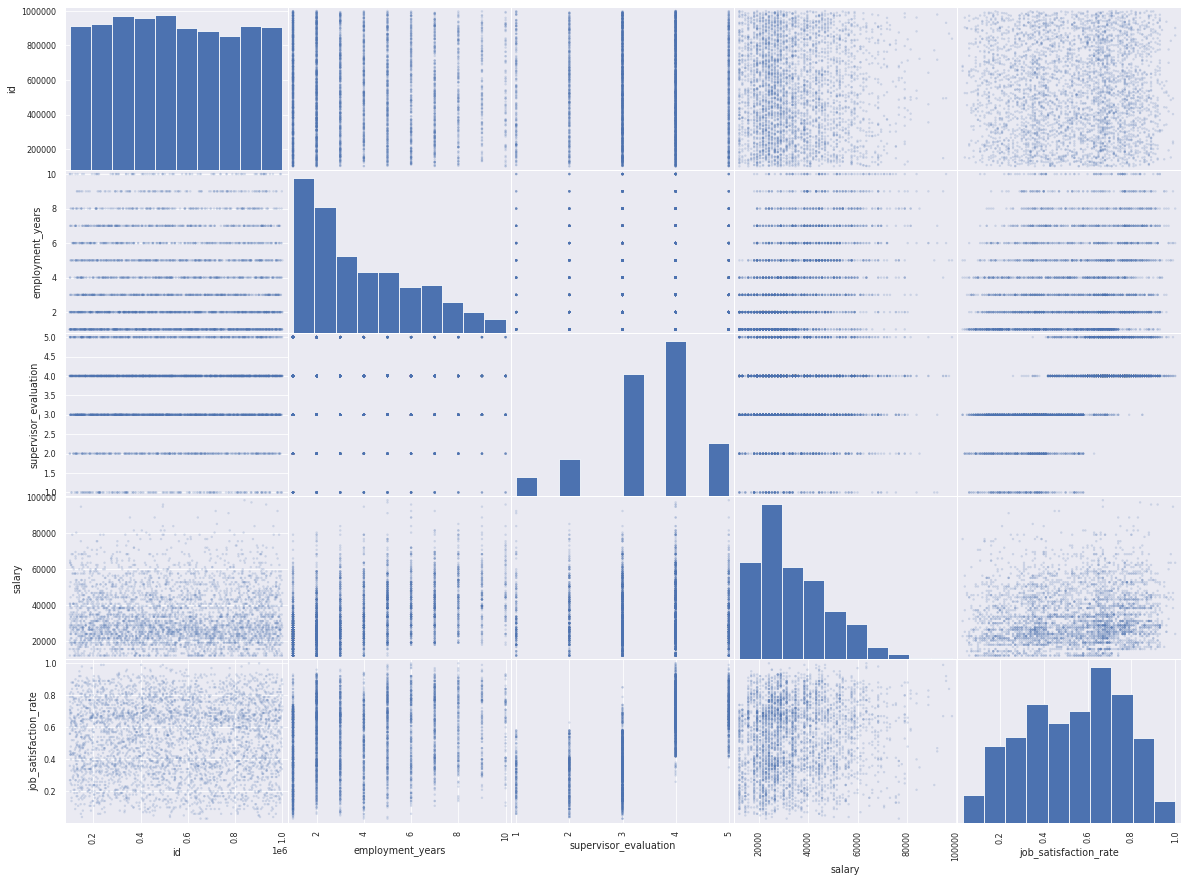

In [22]:
print("\033[1mМатрица диаграмм рассеяния для показателей тренировочной выборки\033[0m")
plotik = pd.plotting.scatter_matrix(Xy_train_js, alpha=0.2,ax=None, figsize = (20,15))
plt.show()

Матрица диаграмм рассеяния для показателей тестовой выборки


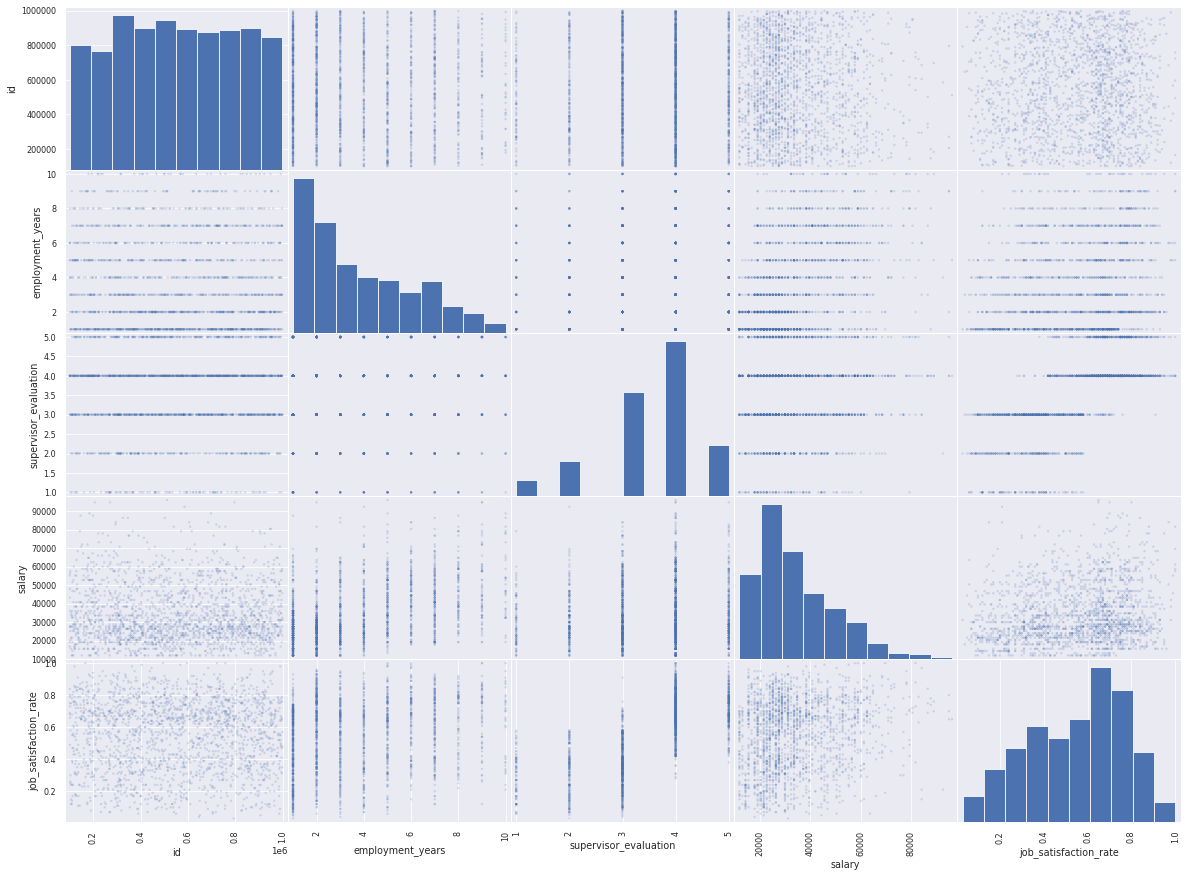

In [23]:
print("\033[1mМатрица диаграмм рассеяния для показателей тестовой выборки\033[0m")
plotik = pd.plotting.scatter_matrix(Xy_test_js, alpha=0.2,ax=None, figsize = (20,15))
plt.show()

По результатам корреляционного анализа было выявлено следующее:
- Между уровнем удовлетворенности и повышением в должности есть высокий уровень линейной связи
- Между уровнем зароботной платы и количеством лет в компании также высокий уровень взаимосвязи
- Занимаемая должность сильно связана с количеством лет в компании и загруженностью
- Нарушение сотрудником ТД сильно связано с уровнем удовлетворенности

#### Вывод

В результате общего анализа данных было выявлено:
- Отдел продаж самый многочисленный (38%)
- По должностям: 47% - рядовые менеджеры, 44% - локальные руководители, 9% - топ менеджмент
- Большинствро сотрудников 52% имеют среднюю загруженность
- В компании большинство сотрудников работают от года до двух
- За последний год повышение было только у 3% персонала
- Около 14% сотрудников за последний год нарушали трудовой договор, остальные не нарушали
- Работа большинства сотрудников оценивается как 4 из 5
- Средняя зарплата у сотрудников около 30 тыс.р.
- У большинства сотрудников уровень удовлетворенности 7 из 10

В результате анализа таргета обнаружено:

По графику с зароботной платой можно обнаружено что у работников, чья зарплата ниже - выше уровень неудовлетворенности. По графикам загруженности очевидно самым довольным является сегмент сотрудников с низкой загруженностью, между тем довольство средне и сильно загруженных отличается не существенно. Самым недовольным классом в разрезе должностей оказался топ менеджмент, самые довольные - локальные руководители.

По результатам корреляционного анализа было выявлено следующее:
- Между уровнем удовлетворенности и повышением в должности есть высокий уровень линейной связи
- Между уровнем зароботной платы и количеством лет в компании также высокий уровень взаимосвязи
- Занимаемая должность сильно связана с количеством лет в компании и загруженностью
- Нарушение сотрудником ТД сильно связано с уровнем удовлетворенности
- Тестовая и тренировочная выборки по коэффициентам практически не отличаются

<a id='5-topoc'></a>
### Подготовка данных

In [24]:
Xy_train_js_i = Xy_train_js.set_index('id')
X_test_js_i = X_test_js.set_index('id')
y_test_js_i = y_test_js.set_index('id')

In [25]:
full_1 = pd.merge(X_test_js_i, y_test_js_i, left_index=True, right_index=True)
X_test_js = full_1.drop('job_satisfaction_rate',axis=1)
y_test_js = full_1['job_satisfaction_rate']

In [26]:
print(Xy_train_js_i.duplicated().sum())
Xy_train_js_i = Xy_train_js_i.drop_duplicates()
print(Xy_train_js_i.duplicated().sum())

245
0


In [27]:
X_train = Xy_train_js_i.drop(['job_satisfaction_rate'], axis=1)
y_train = Xy_train_js_i['job_satisfaction_rate']

def custom_metric(y_true, y):
    return 100/len(y_true) * np.sum(2 * np.abs(y - y_true) / (np.abs(y_true) + np.abs(y)))

smap_score = make_scorer(custom_metric, greater_is_better= False)

In [28]:
ohe_columns = ['dept','last_year_promo','last_year_violations']

ord_columns = ['level','workload']

num_columns = ['employment_years',
               'supervisor_evaluation',
               'salary'
              ]

ord_categories = [
                  ['junior', 'middle','senior'],
                  ['low', 'medium', 'high']

                 ]


ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe',SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        ('ohe', OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'))
    ])

In [29]:
ord_pipe = Pipeline(
    [
        ('simpleImputer_before_ord',SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        ('ord', OrdinalEncoder(
                categories=ord_categories,
                handle_unknown='use_encoded_value',
                unknown_value=np.nan)),
        ('simpleImputer_after_ord',SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ])


data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)



pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])

In [30]:
param_grid = [

    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 12),
        'models__max_features': range(2,9),
        'models__min_samples_split': range(2,8),
        'models__min_samples_leaf': range(1,8),
        'preprocessor__num': [ MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe]
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe]
    }
]

<a id='6-topoc'></a>
### Обучение моделей

In [31]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    cv=10,
    scoring=smap_score,
    n_jobs=-1,
    random_state=RANDOM_STATE
)

In [32]:
randomized_search.fit(X_train, y_train)


print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели, полученная с помощью кросс-валидации:', -randomized_search.best_score_)


y_pred = randomized_search.predict(X_test_js)
metrics = {
    'Средняя квадратичная ошибка': mean_squared_error(y_test_js, y_pred),
    'Средняя абсолютная ошибка': mean_absolute_error(y_test_js, y_pred),
    'R-квадрат': r2_score(y_test_js, y_pred)
}

print("Метрики модели:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

### Интерпритация модели

In [33]:
perm_importance = permutation_importance(
    randomized_search.best_estimator_,
    X_test_js,
    y_test_js,
    n_repeats=10,
    random_state=RANDOM_STATE
)

feature_importances = pd.DataFrame(
    {
        'Feature': X_train.columns,
        'Importance': perm_importance.importances_mean
    })

print(feature_importances.sort_values('Importance', ascending=False))

                 Feature  Importance
6  supervisor_evaluation    1.079854
1                  level    0.286141
7                 salary    0.247186
3       employment_years    0.242859
5   last_year_violations    0.111916
2               workload    0.088294
0                   dept    0.080632
4        last_year_promo    0.019754


In [34]:
y_pred = randomized_search.predict(X_test_js)
test_score = custom_metric(np.array(y_test_js), y_pred)
print('Метрика SMAP на тестовой выборке: ', test_score)

Метрика SMAP на тестовой выборке:  14.984271944132685


In [35]:
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

y_pred = dummy_regressor.predict(X_test_js)
test_score = custom_metric(np.array(y_test_js), y_pred)
print('Метрика SMAP на тестовой выборке: ', test_score)

Метрика SMAP на тестовой выборке:  38.26225790202238


<a id='7-topoc'></a>
### Вывод

Лучшая модель: Дерево решений (параметры: max_depth=11, max_features=8, min_samples_leaf=4, random_state=42)

Метрика лучшей модели по кросс валидацинной выборке: -15.26605385380048

Модель обозначила, что на уровень удовлетворенности больше всего оказывают влияние должность и отдел. Как заметили ранее на исследовательском анализе - должность действительно оказывает очень большое влияние на уровень удовлетворенности сотрудника.


<a id='задача2'></a>
## Задача 2: предсказание увольнения сотрудника из компании

<a id='2.1-topoc'></a>
### Загрузка данных

In [36]:
Xy_train_q = pd.read_csv('/datasets/train_quit.csv', sep=',')
X_test_q = pd.read_csv('/datasets/test_features.csv', sep=',')
y_test_q = pd.read_csv('/datasets/test_target_quit.csv', sep=',')

In [37]:
display(Xy_train_q.head(5))
Xy_train_q.info()

display(X_test_q.head(5))
X_test_q.info()

display(y_test_q.head(5))
y_test_q.info()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


#### Вывод

Во втором датасете обнаружены пропуски, данные хорошо структурированы, значений представлено достаточное количество для анализа.

<a id='3.1-topoc'></a>
### Предобработка данных

Обработка пропусков будет выполнена в пайплайне, проведем повторную проверку на выбросы и дубликаты.

In [38]:
print(Xy_train_q.duplicated().sum())
print(X_test_q.duplicated().sum())
print(y_test_q.duplicated().sum())

0
0
0


In [39]:
data_q = {
    '1':Xy_train_q,
    '2':X_test_q,
    '3':y_test_q
}

In [40]:
for name, df in data_q.items():
    print(name)
    for i in df:
        print(i)
        print(df[i].unique())

1
id
[723290 814010 155091 ... 536432 692133 853842]
dept
['sales' 'purchasing' 'marketing' 'technology' 'hr']
level
['middle' 'junior' 'sinior']
workload
['high' 'medium' 'low']
employment_years
[ 2  5  1  8  4  7  3  9  6 10]
last_year_promo
['no' 'yes']
last_year_violations
['no' 'yes']
supervisor_evaluation
[4 1 3 5 2]
salary
[54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800
 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000
 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000
 43200 73200 31200 78000 64800 72000 94800 96000 63600 79200 55200 42000
 49200 50400 14400 13200 51600 67200 88800 68400 69600 70800 84000 81600
 87600 75600 91200 76800 74400 80400 85200 86400 92400]
quit
['no' 'yes']
2
id
[485046 686555 467458 ... 305653 160233 771859]
dept
['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level
['junior' 'middle' 'sinior' nan]
workload
['medium' 'low' 'high' ' ']
employment_years
[ 2  1  5  6  3  

In [41]:
X_test_q['dept'] = X_test_q['dept'].replace(' ',None)
X_test_q['workload'] = X_test_q['workload'].replace(' ',None)

Xy_train_q['level'] = Xy_train_q['level'].replace('sinior','senior')
X_test_q['level'] = X_test_q['level'].replace('sinior','senior')

1


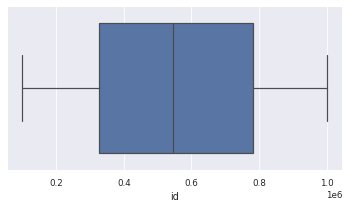

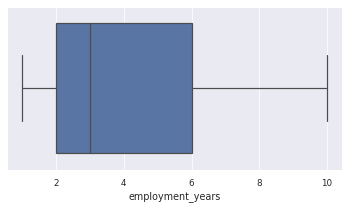

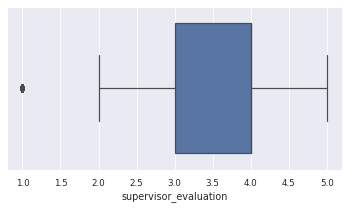

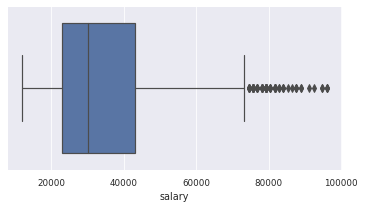

2


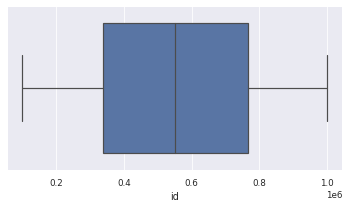

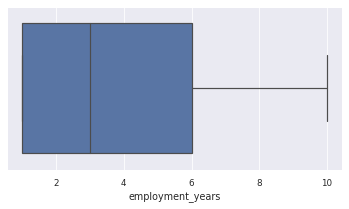

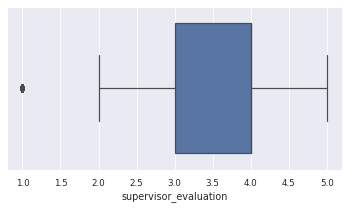

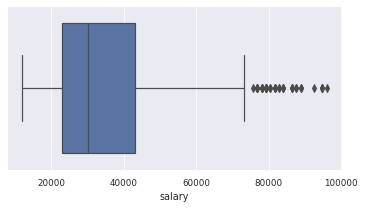

3


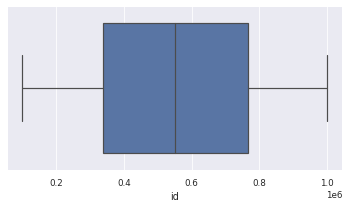

In [42]:
for name, df in data_q.items():
    print(name)
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            plt.figure(figsize=(6,3))
            sb.boxplot(x=df[col])
            plt.show()

#### Вывод

В предоставленных данных полных и неявных дубликатов не обнаружено. Выбросов также не обнаружено. Обнаружены пропуски, но заполнять пропуски на данном этапе не будем, это будет сделано в пайплайне.

<a id='4.1-topoc'></a>
### Исследовательский анализ

Исследовательский анализ был проведен ранее, тут проведем аналитику по новому таргету.

#### Анализ таргета по тренировойной выборке

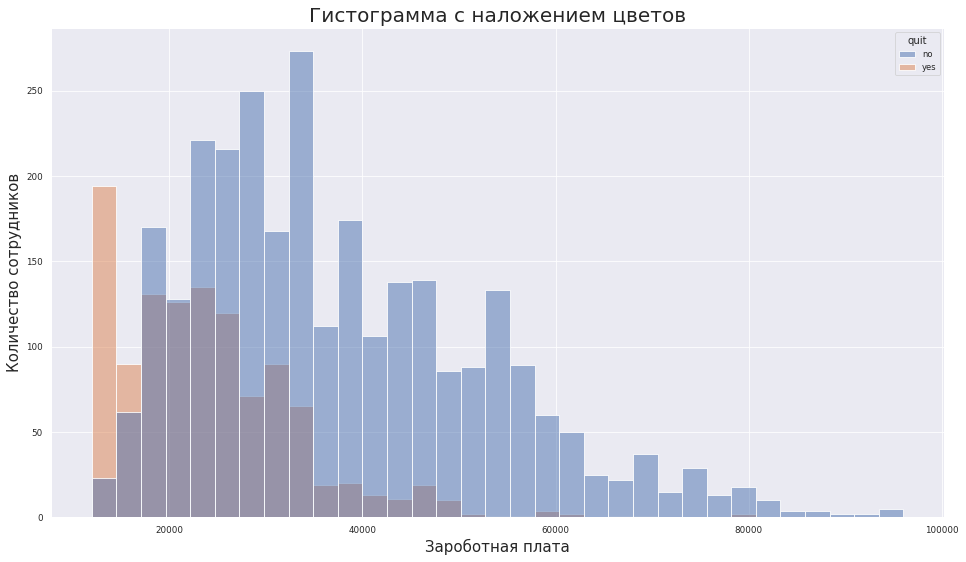

In [43]:
pl = sb.histplot(data=Xy_train_q, x='salary', hue='quit')
pl.set_title('Гистограмма с наложением цветов', fontsize=20)
pl.set_xlabel('Зароботная плата', fontsize=15)
pl.set_ylabel('Количество сотрудников', fontsize=15)
plt.show()

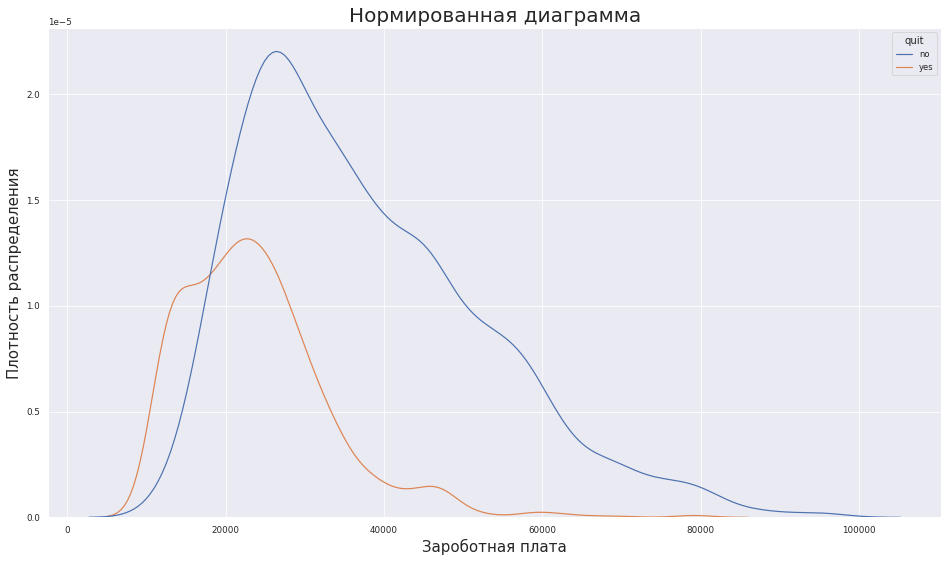

In [44]:
pl = sb.kdeplot(data=Xy_train_q, x='salary', hue='quit')
pl.set_title('Нормированная диаграмма', fontsize=20)
pl.set_xlabel('Зароботная плата', fontsize=15)
pl.set_ylabel('Плотность распределения', fontsize=15)
plt.show()

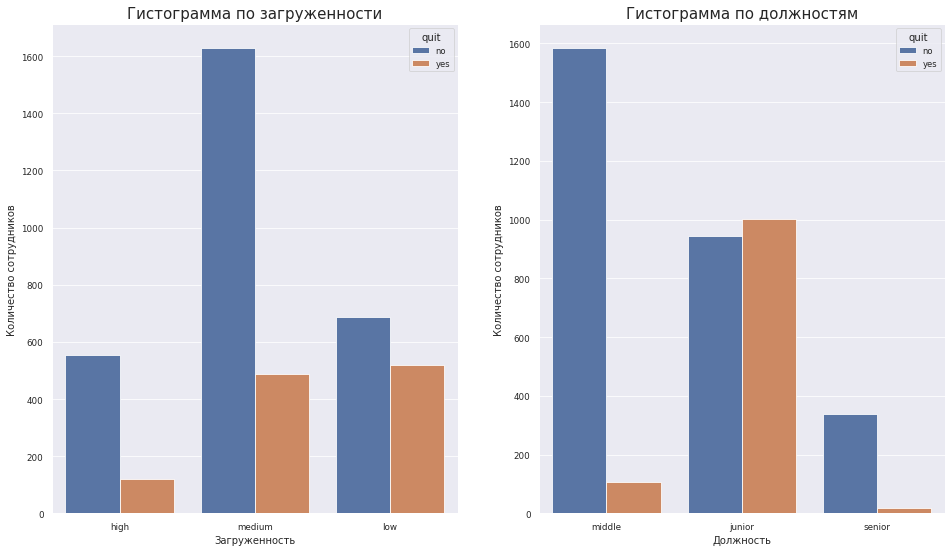

In [45]:
plt.subplot(1, 2, 1)
sb.countplot(data=(Xy_train_q), x='workload', hue='quit')
plt.title('Гистограмма по загруженности', fontsize=15)
plt.xlabel('Загруженность', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.subplot(1, 2, 2)
Xy_train_q_plt = Xy_train_q.dropna()
sb.countplot(data=(Xy_train_q), x='level', hue='quit')
plt.title('Гистограмма по должностям', fontsize=15)
plt.xlabel('Должность', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.show()

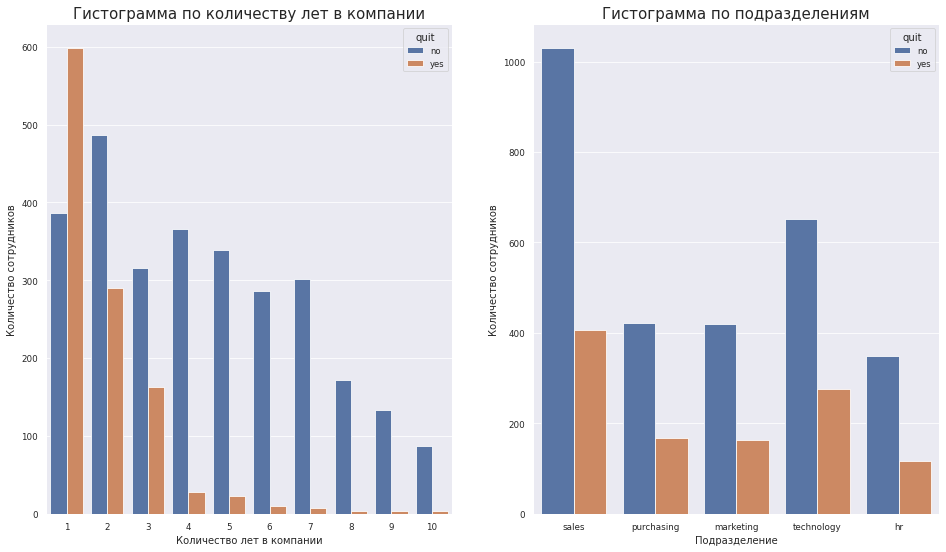

In [46]:
plt.subplot(1, 2, 1)
sb.countplot(data=(Xy_train_q), x='employment_years', hue='quit')
plt.title('Гистограмма по количеству лет в компании', fontsize=15)
plt.xlabel('Количество лет в компании', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.subplot(1, 2, 2)

sb.countplot(data=(Xy_train_q), x='dept', hue='quit')
plt.title('Гистограмма по подразделениям', fontsize=15)
plt.xlabel('Подразделение', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.show()

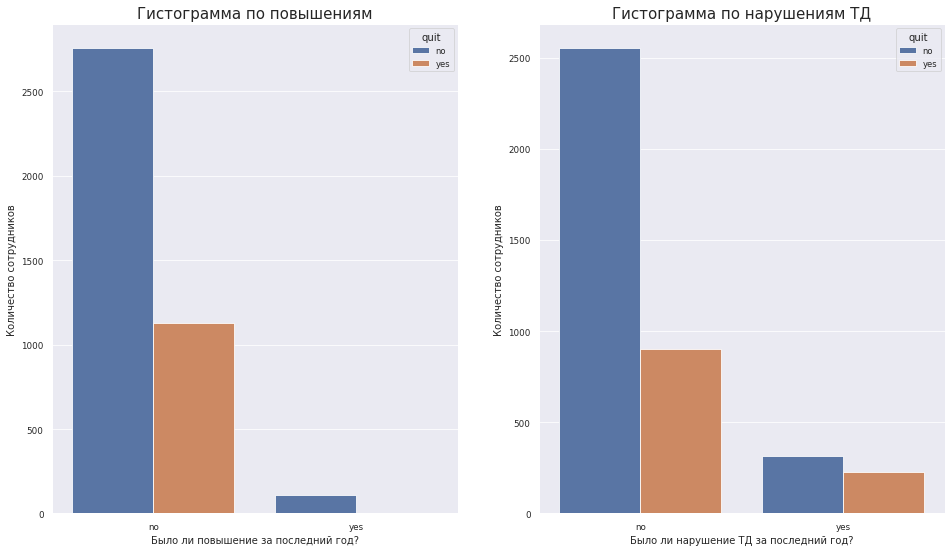

In [47]:
plt.subplot(1, 2, 1)
sb.countplot(data=(Xy_train_q), x='last_year_promo', hue='quit')
plt.title('Гистограмма по повышениям', fontsize=15)
plt.xlabel('Было ли повышение за последний год?', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.subplot(1, 2, 2)

sb.countplot(data=(Xy_train_q), x='last_year_violations', hue='quit')
plt.title('Гистограмма по нарушениям ТД', fontsize=15)
plt.xlabel('Было ли нарушение ТД за последний год?', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10)
plt.show()

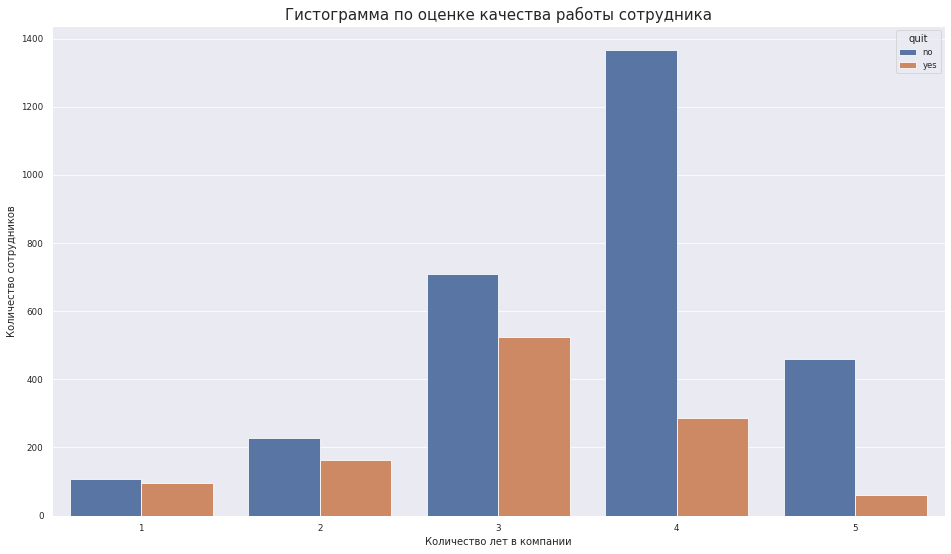

In [48]:
sb.countplot(data=(Xy_train_q), x='supervisor_evaluation', hue='quit')
plt.title('Гистограмма по оценке качества работы сотрудника', fontsize=15)
plt.xlabel('Количество лет в компании', fontsize=10)
plt.ylabel('Количество сотрудников', fontsize=10);

In [49]:
for col in Xy_train_q:
    if col!='id'and col!='salary':
        print(Xy_train_q.groupby([col])['quit'].value_counts(normalize=True))

dept        quit
hr          no      0.750000
            yes     0.250000
marketing   no      0.719931
            yes     0.280069
purchasing  no      0.717687
            yes     0.282313
sales       no      0.716968
            yes     0.283032
technology  no      0.702586
            yes     0.297414
Name: quit, dtype: float64
level   quit
junior  yes     0.514623
        no      0.485377
middle  no      0.936246
        yes     0.063754
senior  no      0.952381
        yes     0.047619
Name: quit, dtype: float64
workload  quit
high      no      0.820475
          yes     0.179525
low       no      0.570364
          yes     0.429636
medium    no      0.769594
          yes     0.230406
Name: quit, dtype: float64
employment_years  quit
1                 yes     0.608122
                  no      0.391878
2                 no      0.626770
                  yes     0.373230
3                 no      0.659708
                  yes     0.340292
4                 no      0.931298
    

dept


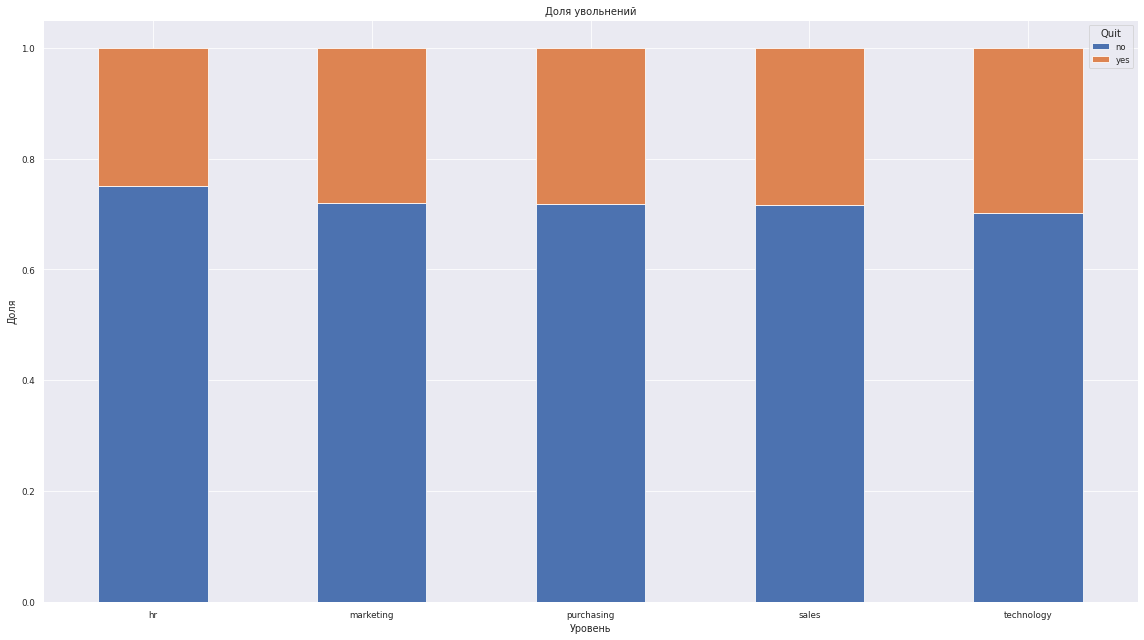

level


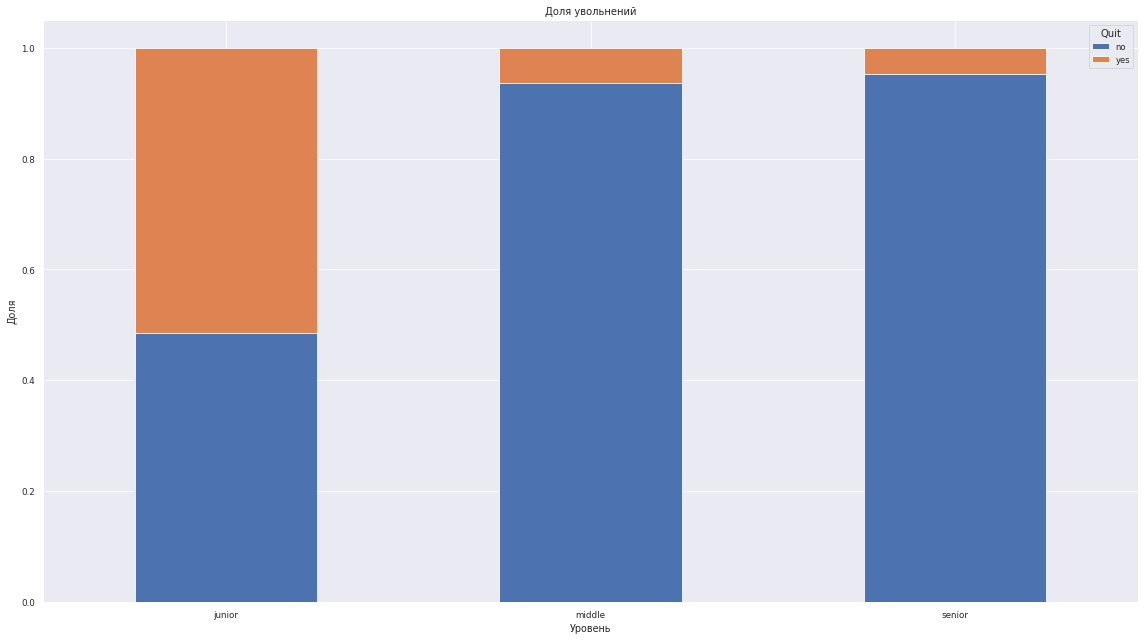

workload


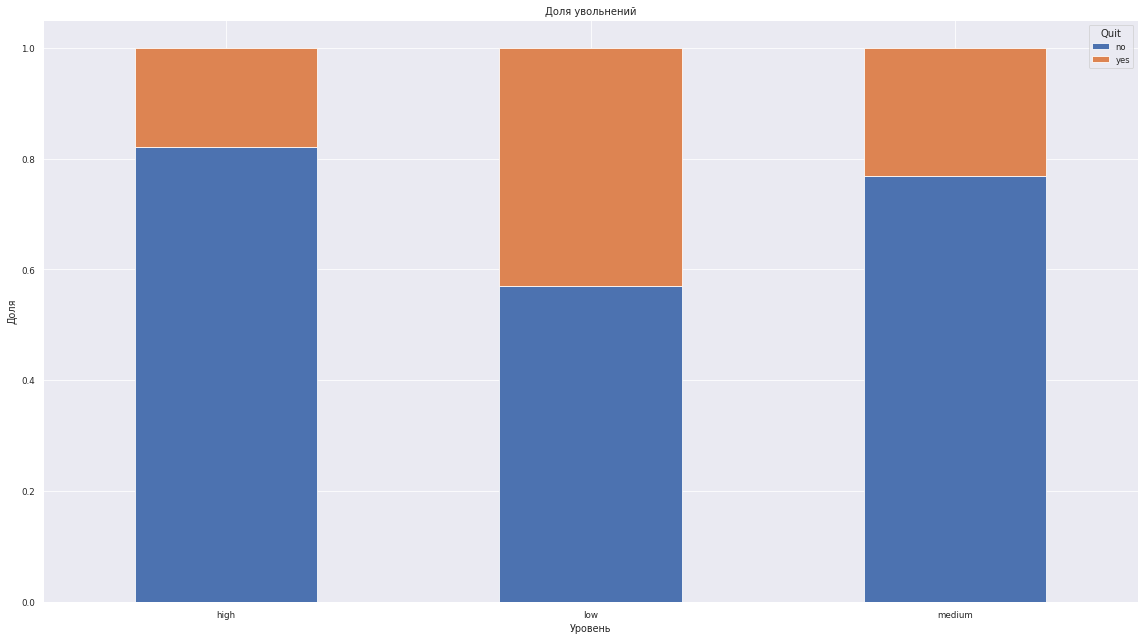

employment_years


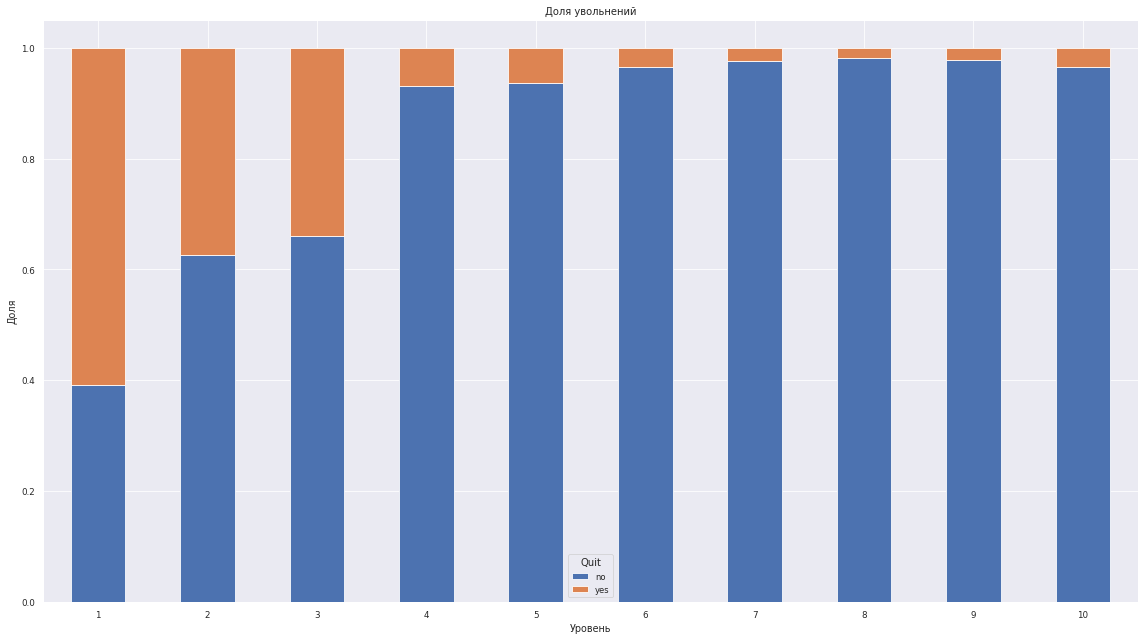

last_year_promo


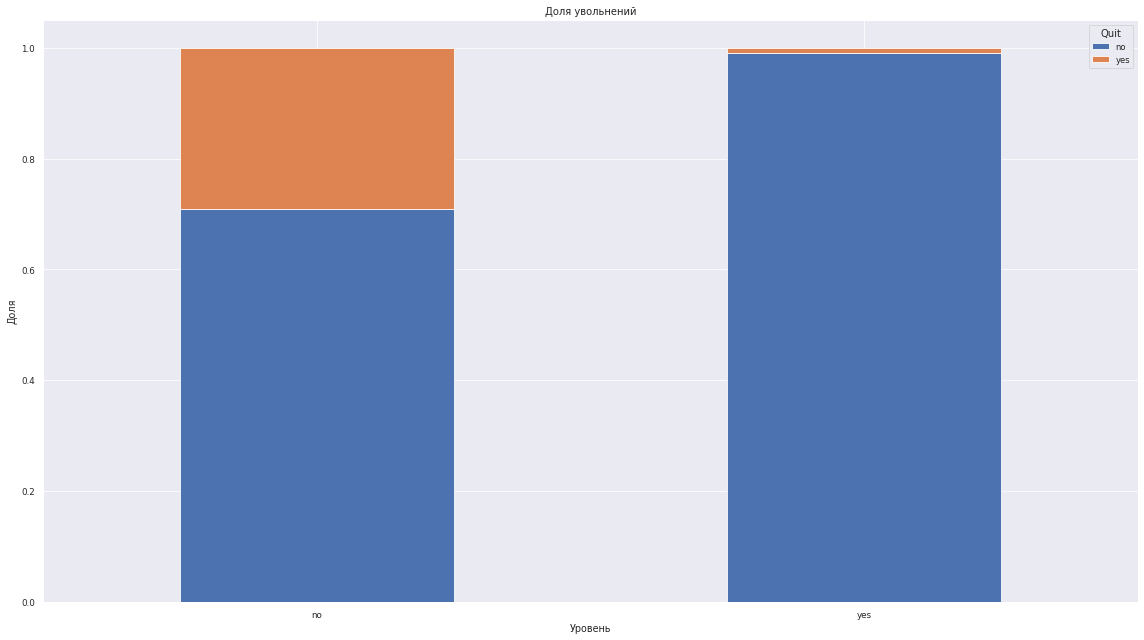

last_year_violations


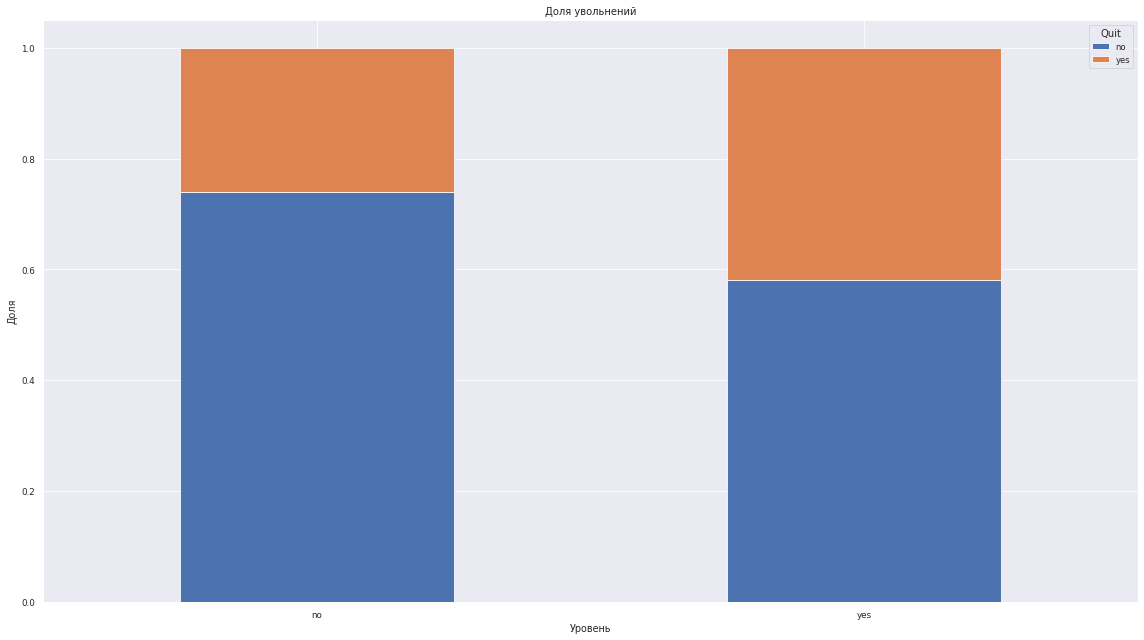

supervisor_evaluation


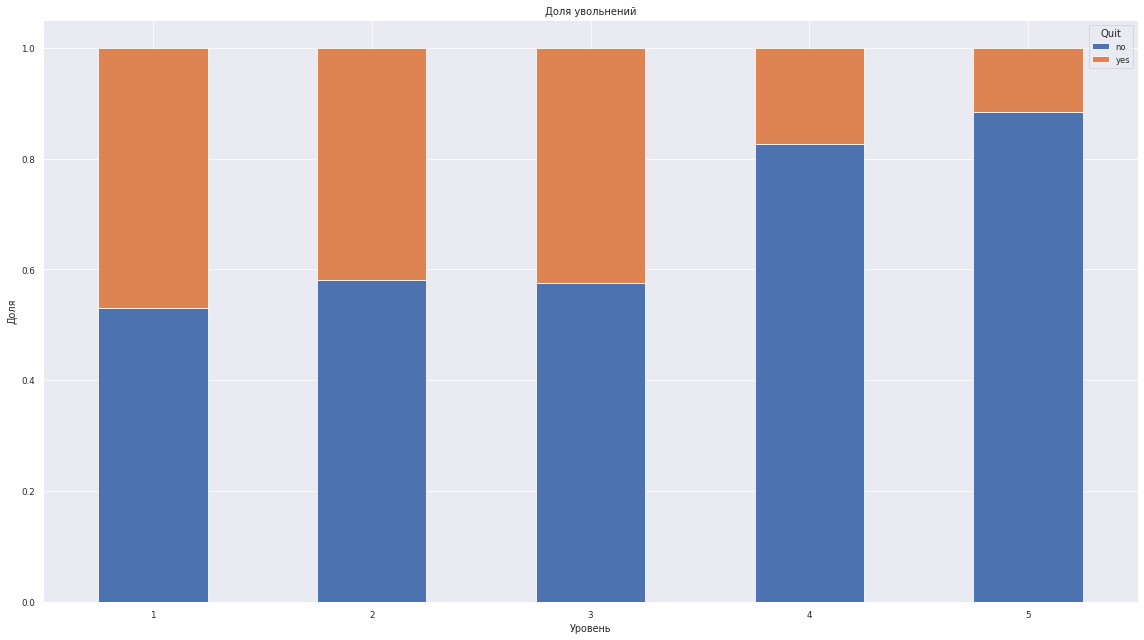

In [50]:
for col in Xy_train_q:
    if col!='id'and col!='salary'and col!='quit':
        print(col)
        grouped=Xy_train_q.groupby([col])['quit'].value_counts(normalize=True).unstack()
        grouped.plot(kind='bar', stacked=True)
        plt.title('Доля увольнений')
        plt.xlabel('Уровень')
        plt.ylabel('Доля')
        plt.xticks(rotation=0) 
        plt.legend(title='Quit')
        plt.tight_layout()
        plt.show()

По графикам выше видно, что чаще всего увольняются сотрудники с рядовыми должностями с низким уровнем загруженности, которые работают в компании не больше года без повышения за последний год.

По графикам выше можно увидеть что зависимости на тестовой выборке несколько отличаются от тренировочной:
- чаще всего увольняются рядовые сотрудники
- из отдела продаж
- их зароботная плата около 20тыс.
- у них средняя загруженность
- они работают в компании до 3х лет
- за последний год у них не было повышения
- трудовой договор за последний год они не нарушали
- уровень удовлетворенности около 0.3

Реже всего увольняются топ менеджеры из отдела продаж, с средней загруженностью и зароботной платой, которые работают в компании больше пяти лет и получили повышение за последний год.

#### Корреляционный анализ

In [51]:
Xy_train_q_plt['job_satisfaction_rate'] = randomized_search.predict(Xy_train_q_plt)

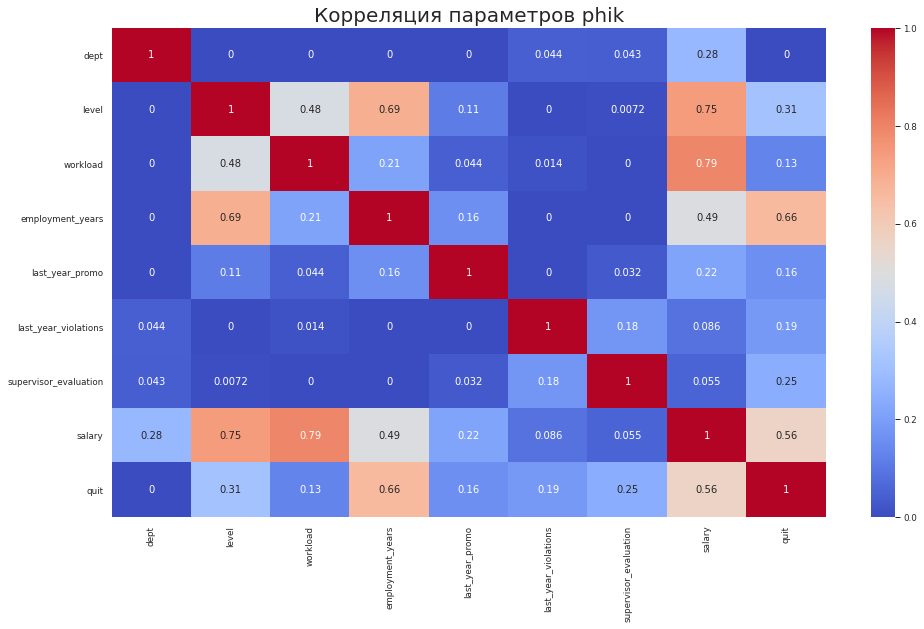

In [52]:
full_phik = Xy_train_q.drop('id',axis=1)
full_phik = sb.heatmap(full_phik.phik_matrix(interval_cols=[
                                                              'salary',
                                                              'job_satisfaction_rate'
                                                             ]
                                              ), annot=True, cmap='coolwarm')
full_phik.set_title('Корреляция параметров phik', fontsize=20)
plt.show()

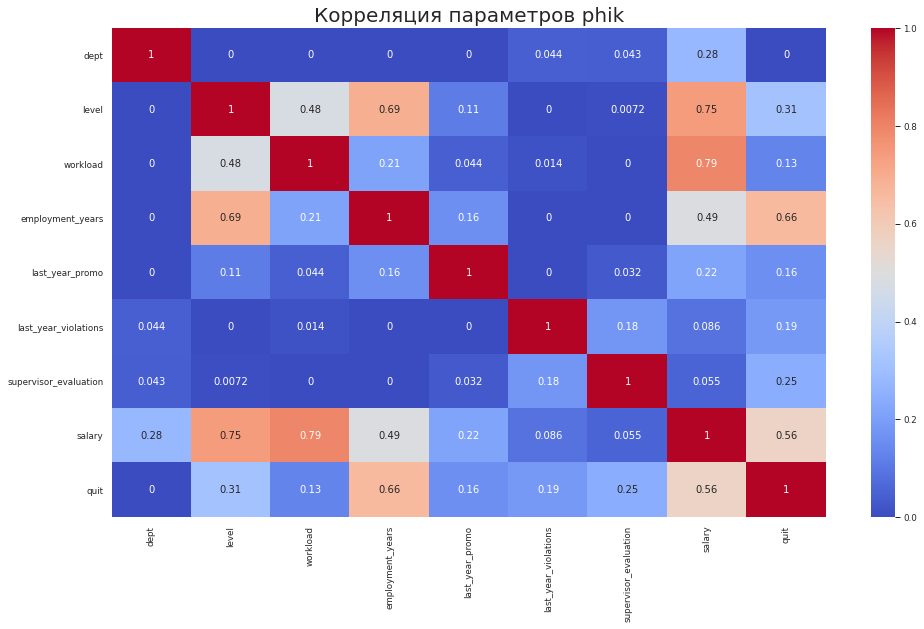

In [53]:
full_phik = Xy_train_q.drop('id',axis=1)
full_phik = sb.heatmap(full_phik.phik_matrix(interval_cols=[
                                                              'salary',
                                                              'job_satisfaction_rate'
                                                             ]
                                              ), annot=True, cmap='coolwarm')
full_phik.set_title('Корреляция параметров phik', fontsize=20)
plt.show()

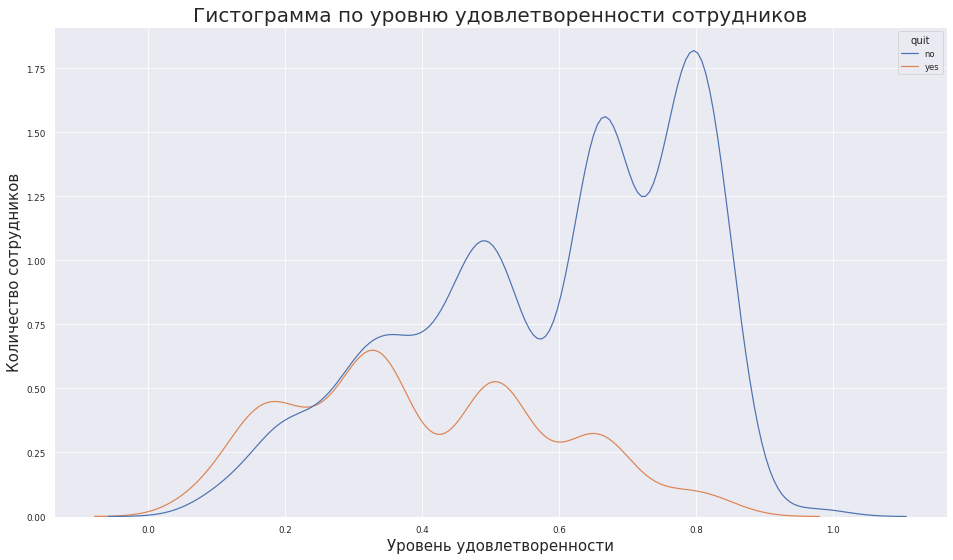

In [54]:
pl = sb.kdeplot(data=Xy_train_q_plt, x='job_satisfaction_rate', hue='quit')
pl.set_title('Гистограмма по уровню удовлетворенности сотрудников', fontsize=20)
pl.set_xlabel('Уровень удовлетворенности', fontsize=15)
pl.set_ylabel('Количество сотрудников', fontsize=15)
plt.show()

#### Вывод

В результате исследовательского анализа было выявлено что зависимости на тестовой выборке несколько отличаются от тренировочной:

- чаще всего увольняются рядовые сотрудники
- из отдела продаж
- их зароботная плата около 20тыс.
- у них средняя загруженность (малая на тренировочной)
- они работают в компании до 3х лет
- за последний год у них не было повышения
- трудовой договор за последний год они не нарушали
- уровень удовлетворенности около 0.3 (0.7 на тренировочной)

Реже всего увольняются топ менеджеры из отдела продаж, с средней загруженностью и зароботной платой, которые работают в компании больше пяти лет и получили повышение за последний год.

В результате корреляционного анализа выявлено что уровень связи удовлетворонности с другими параметрами на тестовой и тренировочной выборках существенно различаются, поэтому показатель нельзя использовать для обучения модели

<a id='6.1-topoc'></a>
### Добавление нового входного признака

In [55]:
Xy_train_q_full = Xy_train_q.copy()
Xy_train_q_full = Xy_train_q_full.drop('quit',axis=1)
Xy_train_q_full['job_satisfaction_rate'] = randomized_search.predict(Xy_train_q_full)
Xy_train_q_full['quit'] = Xy_train_q['quit']
Xy_train_q_full

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,723290,sales,middle,high,2,no,no,4,54000,0.591077,no
1,814010,sales,junior,medium,2,no,no,4,27600,0.779400,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,0.360000,no
3,257132,sales,junior,medium,2,no,yes,3,24000,0.340000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,0.764783,no
...,...,...,...,...,...,...,...,...,...,...,...
3995,588809,sales,junior,medium,4,no,no,3,26400,0.536667,no
3996,672059,sales,middle,high,9,no,no,4,52800,0.804444,no
3997,536432,purchasing,junior,low,2,no,yes,4,12000,0.517500,yes
3998,692133,purchasing,middle,medium,2,no,no,4,33600,0.495909,no


In [56]:
X_test_q['job_satisfaction_rate'] = randomized_search.predict(X_test_js)

<a id='6.1-topoc'></a>
### Подготовка данных

In [57]:
Xy_train_q_full = Xy_train_q_full.set_index('id')
X_test_q_i = X_test_q.set_index('id')
y_test_q_i = y_test_q.set_index('id')

In [58]:
le = LabelEncoder()
Xy_train_q_full['quit'] = le.fit_transform(Xy_train_q_full['quit'])
y_test_q_i['quit'] = le.transform(y_test_q_i['quit'])

In [59]:
Xy_train_q_full = Xy_train_q_full.drop_duplicates()
X_train = Xy_train_q_full.drop(['quit'], axis=1)
y_train = Xy_train_q_full['quit']

full_2 = pd.merge(X_test_q_i, y_test_q_i, left_index=True, right_index=True)
X_test = full_2.drop('quit',axis=1)
y_test = full_2['quit']

In [60]:
num_columns_q = ['employment_years',
               'supervisor_evaluation',
               'salary',
               'job_satisfaction_rate'
              ]


data_preprocessor_q = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns_q)
    ],
    remainder='passthrough'
)



pipe_final_q = Pipeline([
    ('preprocessor', data_preprocessor_q),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])



param_grid_q = [

    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(6, 7),
        'models__max_features': range(4,5),
        'models__min_samples_split': range(5,6),
        'models__min_samples_leaf': range(7,8),
        'preprocessor__num': [ MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe]
    },


    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe]
    },



    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'preprocessor__ohe': [ohe_pipe],
        'preprocessor__ord': [ord_pipe]
    }

]

<a id='7.1-topoc'></a>
### Обучение моделей

In [61]:
randomized_search_q = RandomizedSearchCV(
    pipe_final_q,
    param_grid_q,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

randomized_search_q.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n', randomized_search_q.best_estimator_)
print ('Метрика лучшей модели, полученная с помощью кросс-валидации:', randomized_search_q.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                            

In [62]:
perm_importance = permutation_importance(
    randomized_search_q.best_estimator_,
    X_test_q_i,
    y_test_q_i,
    n_repeats=10,
    random_state=RANDOM_STATE
)

feature_importances = pd.DataFrame(
    {
        'Feature': X_train.columns,
        'Importance': perm_importance.importances_mean
    })

# Сортировка таблицы по важности
print(feature_importances.sort_values('Importance', ascending=False))

                 Feature  Importance
6  supervisor_evaluation     0.01145
8  job_satisfaction_rate     0.01015
0                   dept     0.00135
2               workload     0.00005
5   last_year_violations    -0.00020
4        last_year_promo    -0.00025
3       employment_years    -0.02745
7                 salary    -0.02920
1                  level    -0.03290


По значимости признаков оказалось, что больше всего увольнение связано с уровнем зароботной платы. Ранее на исследовательском и корреляционном анализах мы эту тенденцию уже видели.

In [63]:
quit_test_pred_proba = randomized_search_q.best_estimator_.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, quit_test_pred_proba[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.920122014460973


Метрика лучшей модели, полученная с помощью кросс-валидации: 0.92012. Это допустимо, берем модель в работу как лучшую.

In [64]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)

y_pred = dummy_classifier.predict_proba(X_test_q_i)[:, 1]

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_q_i, y_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.5


<a id='задача3'></a>
## Общий вывод

Для проведения исследования предоставлены шесть датасетов.

**1) В ходе превичного изучения данных было сделано:**

- Было обнаружено незначительное количество пропусков, их обработка была проведена позже в пайплайне
- Полных дубликатов обнаружено не было
- Неявные дубликаты обнаружено не было
- Специфика датасетов не позволяет полноценно классифицировать выбросы, поэтому обработка выбросов не производилась


---

**2) В результате проведенного исследовательского анализа данных можно сделать следующие выводы:**

- Отдел продаж самый многочисленный (38%)
- По должностям: 47% - рядовые менеджеры, 44% - локальные руководители, 9% - топ менеджмент
- Большинствро сотрудников 52% имеют среднюю загруженность
- В компании большинство сотрудников работают от года до двух
- За последний год повышение было только у 3% персонала
- Около 14% сотрудников за последний год нарушали трудовой договор, остальные не нарушали
- Работа большинства сотрудников оценивается как 4 из 5
- Средняя зарплата у сотрудников около 30 тыс.р.
- У большинства сотрудников уровень удовлетворенности 7 из 10

В результате анализа таргета обнаружено:

По графику с зароботной платой можно обнаружено что у работников, чья зарплата ниже - выше уровень неудовлетворенности. По графикам загруженности очевидно самым довольным является сегмент сотрудников с низкой загруженностью, между тем довольство средне и сильно загруженных отличается не существенно. Самым недовольным классом в разрезе должностей оказался топ менеджмент, самые довольные - локальные руководители.

По результатам корреляционного анализа было выявлено следующее:

- Между уровнем удовлетворенности и повышением в должности есть высокий уровень линейной связи
- Между уровнем зароботной платы и количеством лет в компании также высокий уровень взаимосвязи
- Занимаемая должность сильно связана с количеством лет в компании и загруженностью
- Нарушение сотрудником ТД сильно связано с уровнем удовлетворенности

---

**3) Задача 1: предсказание уровня удовлетворенности**


Для предсказания были взяты все признаки из датасетов, обучено две модели: дерево решений и линейная регрессия. По метрикам на кросс валидационной выборке лучшие результаты показало дерево решений.

- Параметры лучшей модели: max_depth=10, max_features=8,min_samples_leaf=2, min_samples_split=5
- Метрика лучшей модели, полученная с помощью кросс-валидации: 16.019274094225857.
- Средняя квадратичная ошибка: 0.0069
- Средняя абсолютная ошибка: 0.0638
- R-квадрат: 0.8580
- Метрика симметричного среднего абсолютного процентного отклонения лучшей модели на тестовой выборке:  14.853

Модель обозначила, что на уровень удовлетворенности больше всего оказывают влияние должность и оценка руководителя. Как заметили ранее на исследовательском анализе - должность действительно оказывает очень большое влияние на уровень удовлетворенности сотрудника.

---


**4) В результате исследователького анализа нового таргета было выявлено:**


Зависимости на тестовой выборке несколько отличаются от тренировочной:

- чаще всего увольняются рядовые сотрудники
- из отдела продаж
- их зароботная плата около 20тыс.
- у них средняя загруженность (малая на тренировочной)
- они работают в компании до 3х лет
- за последний год у них не было повышения
- трудовой договор за последний год они не нарушали
- уровень удовлетворенности около 0.3 (0.7 на тренировочной)

Реже всего увольняются топ менеджеры из отдела продаж, с средней загруженностью и зароботной платой, которые работают в компании больше пяти лет и получили повышение за последний год.

В результате корреляционного анализа выявлено что уровень связи удовлетворонности с другими параметрами на тестовой и тренировочной выборках существенно различаются.

---

**5) Задача 2: предсказание увольнения сотрудника:**

Для предсказания были взяты не все признаки из датасетов.
Причины исключения признаков заключаются в следующем:
- last_year_promo (во время исследовательского анализа мы выяснили, что повышение было только у 3% сотрудников, поэтому параметр скорее мешает модели чем помогает)
- job_satisfaction_rate (во время корреляционного анализа обнаружили, что показатель коэффициент связи с другими параметрами и таргетом на тестовой и на тренировочной выборке сильно различаются, что тоже плохо влияет на метрики модели)
- level ( показатель тоже не равномерно коррелирует с таргетом и другими признаками на тестовой и тренировочной выборках + 9% топ менеджмента вносят много шума)

Было обучено четыре модели классификации с перебором гиперпараметров.
По метрикам на кросс валидационной выборке лучшие результаты показала логистическая регрессия:

- Параметры лучшей модели: C=12, penalty='l1', random_state=42,solver='liblinear', warm_start=True
- Метрика лучшей модели, полученная с помощью кросс-валидации:  0.9221
- Метрика ROC-AUC на тестовой выборке: 0.904330

По значимости признаков оказалось, что больше всего увольнение связано с уровнем зароботной платы и количеством лет в компании. Ранее на исследовательском и корреляционном анализах мы эту тенденцию уже видели.

---

**6) Вывод:**

По итогу последовательного обучения было выявлено, что для поддержания уровня удовлетворенности сотрудников можно сделать следующее:

- Сотрудникам, которые работают от года до двух лет давать возможности карьерного роста
- Постараться увеличить загруженность на сотрудников, чтобы повлиять на оценку их работы руководителем (люди чувствуют удовлетворение, когда они нужны и их ценят)

По итогу последовательного обучения было выявлено, что для снижения оттока кадров можно сделать следующее:

- Повысить зарплату рядовым менеджерам, у которых сейчас уровень зп не превышает 20тыс.р.
- Увеличить объем работ сотрудников (люди меньше испытывают желание уходить, когда понимают что они нужны)

---

